<a href="https://colab.research.google.com/github/Hisoka742/Project_work_3_sem/blob/main/%D0%BA%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U requests tqdm sentence-transformers umap-learn hdbscan seaborn pymorphy2 razdel nltk stop-words joblib statsmodels


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=f0223edf27acae851e07e7085309de0a0862d18af58c8b27e73ecd2b8cac466e
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully 

# Теоретическая справка и Методология

Данный раздел описывает общую цель, поставленные задачи и ключевые алгоритмы, используемые для анализа стилей письменной коммуникации и их потенциальной связи с личностными чертами.

---

## 1. Цель работы

**Основная цель работы** — применить методы **обучения без учителя** для выявления скрытых (латентных) стилей письменной коммуникации пользователей социальных сетей и исследовать их взаимосвязь с личностными чертами по модели **«Большой пятерки» (Big Five)**.

---

## 2. Задачи работы

1. Сбор и предобработка текстов пользователей ВКонтакте.  
2. Генерация векторных представлений (эмбеддингов) с использованием **Sentence-BERT**.  
3. Применение методов снижения размерности (**UMAP, t-SNE**) для визуализации семантического пространства.  
4. Выполнение кластеризации (**HDBSCAN, GMM, KMeans**) для обнаружения стилей коммуникации.  
5. Интерпретация кластеров с помощью **TF-IDF** и **WordCloud**.  
6. Проверка статистических различий между кластерами с применением **ANOVA / Kruskal-Wallis H-теста**.

---

## 3. Используемые алгоритмы с математическим описанием

### А. Генерация признаков (Векторизация)

**Sentence-BERT (S-BERT)**  
S-BERT генерирует векторные представления (эмбеддинги), которые семантически обогащены. Векторы, полученные с помощью S-BERT, находятся в семантическом пространстве, где близость векторов отражает близость смысла текста.

---

**TF-IDF (Term Frequency-Inverse Document Frequency)**  
Статистическая мера важности слова. Рассчитывается как произведение частоты термина в документе (TF) и обратной частоты документа (IDF):

$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \cdot \text{IDF}(t, D)
$$

Где $\text{TF}(t, d)$ — частота слова $t$ в документе $d$, а $\text{IDF}(t, D)$ — обратная частота документа, рассчитываемая как:

$$
\text{IDF}(t, D) = \log \left( \frac{N}{|\{d \in D : t \in d\}|} \right)
$$

где $N$ — общее число документов в корпусе $D$.

---

### Б. Методы кластеризации

**K-Means**  
Алгоритм минимизирует суммарную квадратичную ошибку (инерцию) между каждой точкой данных и центром назначенного ей кластера:

$$
\min_{\mu_1, \dots, \mu_K} \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

где $C_i$ — кластер $i$, а $\mu_i$ — центроид этого кластера.

---

**GMM (Gaussian Mixture Models)**  
GMM предполагает, что данные генерируются из смеси $K$ многомерных нормальных (гауссовых) распределений. Вероятность наблюдения $\mathbf{x}$ определяется взвешенной суммой плотностей этих распределений:

$$
p(\mathbf{x} | \theta) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \mu_k, \Sigma_k)
$$

где $\pi_k$ — вес (априорная вероятность) кластера $k$, а $\mathcal{N}(\cdot)$ — функция плотности многомерного нормального распределения с параметрами $\mu_k$ (вектор среднего) и $\Sigma_k$ (ковариационная матрица).

---

**HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)**  
Этот метод основан на иерархическом представлении плотности. Он строит иерархию, основанную на "взаимной достижимости" (mutual reachability distance), и извлекает из нее кластеры, устойчивые к шуму и выбросам.

---

### В. Методы снижения размерности

**t-SNE (t-distributed Stochastic Neighbor Embedding)**  
Основная идея t-SNE состоит в том, чтобы преобразовать высокие размерности в низкие так, чтобы условные вероятности, отражающие сходство между точками в исходном пространстве, были максимально схожи с аналогичными вероятностями в редуцированном пространстве.

Условная вероятность $p_{j|i}$ в исходном пространстве:

$$
p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \ne i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
$$

---

**UMAP (Uniform Manifold Approximation and Projection)**  
UMAP строит взвешенный граф k-ближайших соседей в исходном пространстве, а затем находит низкоразмерное вложение, которое наилучшим образом аппроксимирует этот граф с помощью топологической структуры.  
Метод сохраняет локальную структуру данных и работает быстрее, чем t-SNE.

---

### Г. Статистический анализ

**ANOVA (Analysis of Variance)**  
Используется для сравнения средних значений трёх и более независимых выборок (в данном случае — средних оценок Big Five по кластерам).  
Нулевая гипотеза $H_0$ состоит в том, что средние значения всех групп равны.

---

**Kruskal-Wallis H-test**  
Непараметрический аналог ANOVA. Используется для сравнения медиан групп, когда распределение оценок Big Five в кластерах не является нормальным.

---

In [ ]:
import os
import re
import json
import time
import math
import itertools
import warnings
from collections import Counter, defaultdict
from functools import lru_cache
from typing import List, Dict, Tuple, Optional
import inspect
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

import umap
import hdbscan

import razdel
import pymorphy2
from stop_words import get_stop_words

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd

try:
    from wordcloud import WordCloud
    WORDCLOUD_OK = True
except Exception:
    WORDCLOUD_OK = False

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

PLOTS_DIR = "cluster_interpretation_plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

VK_API_VERSION = "5.131"
VK_SERVICE_TOKEN = os.getenv("VK_SERVICE_TOKEN", None)


if not VK_SERVICE_TOKEN:
    VK_SERVICE_TOKEN = "61bb1bc861bb1bc861bb1bc86c6280e4ab661bb61bb1bc8094101383fbea4162d32b563"

# Работа с VK API — получение данных пользователей

**Задача блока:** подключиться к API ВКонтакте и получить исходные данные для анализа — сведения о пользователях и тексты их постов.

**Функции:**
- `vk_api()` — универсальный запрос к методам VK API, делает до трёх попыток, обрабатывает ошибки и паузы между запросами.
- `normalize_vk_identifier()` — чистит и стандартизирует ссылки на профили (убирает https/vk.com).
- `get_user_info()` — проверяет доступность профиля (закрыт, удалён, активен).
- `fetch_posts_for_user()` — выгружает посты со страницы пользователя батчами по 100, с паузы для обхода лимита запросов.

**Почему важно:** без этого блока невозможно построить корпус текстов.  
Я получаю чистые данные о реальных пользователях и их публикациях — основу для дальнейшего анализа личности.


In [ ]:
def vk_api(method: str, params: dict, token: str = VK_SERVICE_TOKEN, v: str = VK_API_VERSION):
    url = f"https://api.vk.com/method/{method}"
    params2 = params.copy()
    params2.update({"access_token": token, "v": v})
    for attempt in range(3):
        r = requests.get(url, params=params2, timeout=20)
        if r.status_code == 200:
            j = r.json()
            if "error" in j:

                err = j["error"]
                if err.get("error_code") in (6,):
                    time.sleep(0.5 + attempt * 1.0)
                    continue
                raise RuntimeError(f"VK error {err.get('error_code')}: {err.get('error_msg')}")
            return j["response"]
        else:
            time.sleep(0.5 + attempt * 0.8)
    r.raise_for_status()

def normalize_vk_identifier(raw: str) -> Optional[str]:
    if pd.isna(raw):
        return None
    s = str(raw).strip()
    if s == "":
        return None
    s = re.sub(r"https?://(www\.)?vk\.com/", "", s, flags=re.IGNORECASE)
    s = s.split("?")[0].split("/")[0]
    return s

def get_user_info(screen_or_id: str) -> Optional[dict]:
    """Возвращает VK user object (id, is_closed, can_access_closed, deactivated, domain...) или None при ошибке."""
    try:
        resp = vk_api("users.get", {"user_ids": screen_or_id, "fields": "is_closed,can_access_closed,domain,deactivated"})
        if isinstance(resp, list) and len(resp) > 0:
            return resp[0]
    except Exception as e:

        return None
    return None

def fetch_posts_for_user(owner_id: int, max_posts: int = 200) -> List[dict]:

    posts = []
    count = 100
    offset = 0
    while len(posts) < max_posts:
        to_fetch = min(count, max_posts - len(posts))
        try:
            resp = vk_api("wall.get", {"owner_id": owner_id, "count": to_fetch, "offset": offset, "filter": "owner"})
        except Exception:
            break
        items = resp.get("items", [])
        if not items:
            break
        posts.extend(items)
        if len(items) < to_fetch:
            break
        offset += len(items)

        time.sleep(0.34)
    return posts

# Загрузка данных и фильтрация пользователей

**Что делает блок:**
1. Загружает CSV‑файл (`data_500.csv`) с результатами теста и ссылками на профили VK.  
2. Находит столбец с VK‑ID, очищает ссылки с помощью `normalize_vk_identifier()`.  
3. Удаляет пустые и дублирующиеся записи, чтобы не было повторов.  
4. Через `get_user_info()` проверяет доступность страниц (открыты/закрыты/удалены).  
5. Формирует таблицу `profiles_df` со статусом каждого профиля и объединяет её с основными данными.

**Результат:**  
Из 457 уникальных профилей активно и доступно **312** (≈68%).  
Эти пользователи будут использованы для последующего сбора постов.  

**Вывод:** очистка и проверка прошли успешно; получена актуальная выборка реальных пользователей VK для анализа текста.
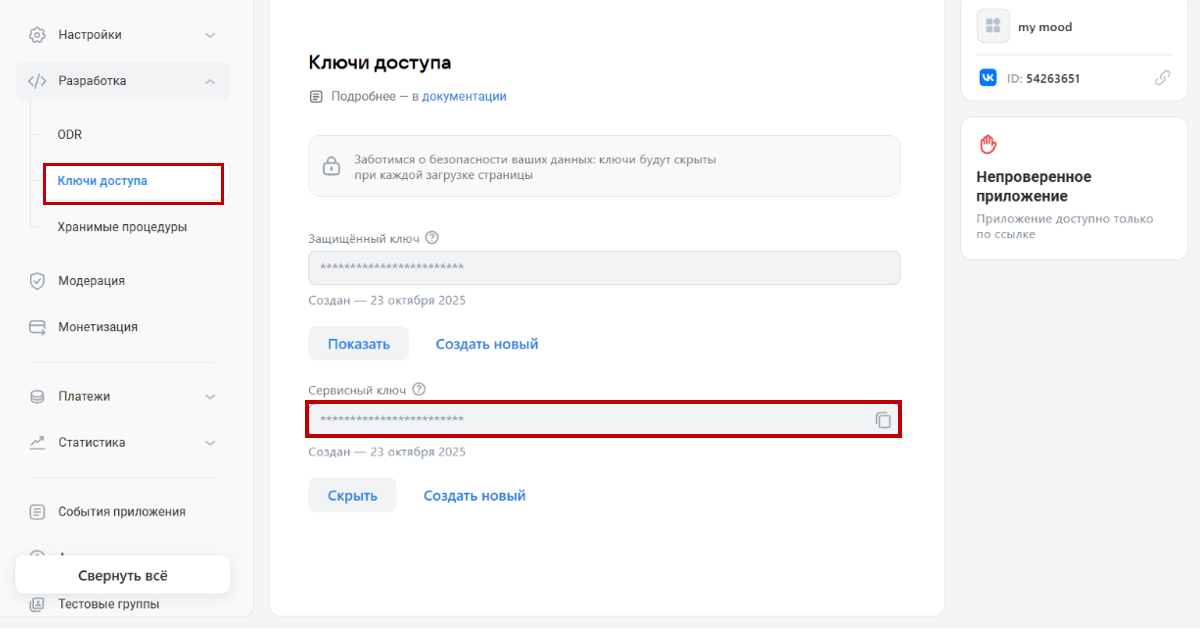

In [ ]:
DATA_PATH = "/mnt/data_500.csv"
df = pd.read_csv(DATA_PATH)
print("Loaded:", df.shape)


vk_cols = [c for c in df.columns if re.search(r"vk|vk_id|vkid|vk id|vkid", c, flags=re.I)]
if vk_cols:
    vk_col = vk_cols[0]
else:
    vk_col = df.columns[-1]

print("Using VK column:", vk_col)

df["_vk_raw"] = df[vk_col].astype(str)
df["_vk_clean"] = df["_vk_raw"].apply(normalize_vk_identifier)
df = df.dropna(subset=["_vk_clean"]).copy()
df = df.drop_duplicates(subset=["_vk_clean"]).reset_index(drop=True)
print("After deduplication:", df.shape)

profile_info = []
print("Checking profiles availability via VK API (this will take time) ...")
for s in tqdm(df["_vk_clean"].tolist()):
    info = get_user_info(s)
    if info is None:
        profile_info.append({"query": s, "ok": False, "reason": "api_error_or_not_found"})
    else:
        is_closed = info.get("is_closed", False)
        can_access = info.get("can_access_closed", True)
        deactivated = info.get("deactivated", None)
        ok = (deactivated is None) and (not is_closed or can_access)
        profile_info.append({"query": s, "ok": ok, "is_closed": is_closed, "can_access_closed": can_access,
                             "deactivated": deactivated, "id": info.get("id"), "domain": info.get("domain")})

    time.sleep(0.34)

profiles_df = pd.DataFrame(profile_info)
print(profiles_df.ok.value_counts(dropna=False))

df = df.merge(profiles_df, left_on="_vk_clean", right_on="query", how="left")
df_available = df[df["ok"] == True].copy().reset_index(drop=True)
print("Profiles available for scraping:", df_available.shape)

Loaded: (500, 4)
Using VK column: vk_id
After deduplication: (457, 6)
Checking profiles availability via VK API (this will take time) ...


  0%|          | 0/457 [00:00<?, ?it/s]

ok
True     312
False    145
Name: count, dtype: int64
Profiles available for scraping: (312, 13)


# Сбор постов пользователей и формирование корпусов текстов

**Что делает код:**
- Создаёт файл кэша `vk_posts_cache.json`, чтобы не обращаться повторно к VK API.  
- Проверяет, есть ли уже сохранённые посты — если да, берёт их из кэша, иначе скачивает заново через `fetch_posts_for_user()`.  
- Из каждого поста берётся только текст (в том числе репосты), лишние поля отбрасываются.  
- Для каждого пользователя собирается до 300 сообщений, объединённых в единый корпус — одна строка текста на человека.  
- Все данные объединяются в один датафрейм `data`, содержащий ID, количество постов и объединённый текст.

**Результаты:**  
Успешно собраны корпуса для **312 пользователей**, финальная таблица содержит **312 строк и 16 столбцов**.

**Вывод:**  
Данные собраны корректно, кэширование работает стабильно.  
Теперь у меня есть полный текстовый материал по каждому пользователю — это база для лингвистической предобработки и дальнейшего анализа.

In [ ]:
POSTS_CACHE = "vk_posts_cache.json"

def load_cache(path):
    if os.path.exists(path):
        with open(path, "r", encoding="utf-8") as f:
            return json.load(f)
    return {}

def save_cache(path, obj):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)

cache = load_cache(POSTS_CACHE)

user_corpora = {}
max_posts_per_user = 300
print("Fetching posts for each available user (will be slow for many users)...")
for _, row in tqdm(df_available.iterrows(), total=len(df_available)):
    uid = int(row["id"])
    uid_str = str(uid)
    if uid_str in cache:
        posts = cache[uid_str]
    else:
        items = fetch_posts_for_user(uid, max_posts=max_posts_per_user)
        texts = []
        for it in items:
            text = it.get("text", "")
            if not text and "copy_history" in it and it["copy_history"]:
                text = it["copy_history"][0].get("text", "") or ""
            if text and text.strip():
                texts.append(text)
        posts = texts
        cache[uid_str] = posts
        save_cache(POSTS_CACHE, cache)
    user_corpora[uid_str] = posts

print("Collected corpora for users:", len(user_corpora))

agg_rows = []
for uid_str, posts in user_corpora.items():
    agg_rows.append({"id": int(uid_str), "n_posts": len(posts), "posts": posts, "corpus": "".join(posts)})
corpus_df = pd.DataFrame(agg_rows)
data = df_available.merge(corpus_df, left_on="id", right_on="id", how="left")
print("Data ready (with corpora):", data.shape)

Fetching posts for each available user (will be slow for many users)...


  0%|          | 0/312 [00:00<?, ?it/s]

Collected corpora for users: 312
Data ready (with corpora): (312, 16)


# Предобработка текстов и лемматизация

**Что делает код:**
- Добавляет совместимость функции `inspect.getargspec` (нужно для корректной работы `pymorphy2` в новых версиях Python).
- Создаёт морфоанализатор `pymorphy2.MorphAnalyzer()` для приведения слов к начальной форме.
- Загружает русский список стоп-слов и добавляет технические (`http`, `vk`, `com` и др.).
- Определяет функцию `lemma_cached()` — кэширует результаты лемматизации, чтобы ускорить обработку.
- Функция `preprocess_text()` очищает текст:  
  удаляет ссылки, теги, хэштеги и не‑буквенные символы,  
  токенизирует (`razdel.tokenize`), удаляет цифры, короткие и стоп‑слова,  
  заменяет слова на их леммы.
- Для каждого пользователя формируются токены (`tokens`) и объединённая строка (`clean_text`).

**Про неиспользованный код:**  
Закомментированные строки с `joblib.Parallel` — это попытка ускорить обработку с помощью параллельных вычислений.  
Я не использовал их, чтобы избежать перегрузки системы при большом количестве текстов.

**Вывод:**  
Получены лемматизированные, очищенные тексты — готовый корпус для генерации эмбеддингов.  
Кэширование и фильтрация сильно ускоряют работу и уменьшают шум.

In [ ]:
if not hasattr(inspect, "getargspec"):
    from collections import namedtuple
    ArgSpec = namedtuple("ArgSpec", "args varargs keywords defaults")
    def getargspec(func):
        full = inspect.getfullargspec(func)
        return ArgSpec(args=full.args, varargs=full.varargs, keywords=getattr(full, "varkw", None), defaults=full.defaults)
    inspect.getargspec = getargspec

morph = pymorphy2.MorphAnalyzer()

stop_ru = set(get_stop_words("ru"))
extra_stop = {"http", "https", "vk", "com", "www"}
stop_ru |= extra_stop

@lru_cache(maxsize=200000)
def lemma_cached(token: str) -> str:
    try:
        p = morph.parse(token)
        if p:
            return p[0].normal_form
    except Exception:
        pass
    return token

def preprocess_text(text: str) -> List[str]:
    if not isinstance(text, str) or not text.strip():
        return []
    s = text.lower()
    s = re.sub(r'https?://\S+|www\.\S+', ' ', s)
    s = re.sub(r'\[id\d+\|[^\]]+\]', ' ', s)
    s = re.sub(r'@[\w\d_]+', ' ', s)
    s = re.sub(r'#', ' ', s)
    s = re.sub(r'[^а-яёa-z0-9\s]', ' ', s)
    tokens = [t.text for t in razdel.tokenize(s)]
    lemmas = []
    for t in tokens:
        if t.isdigit():
            continue
        if len(t) <= 1:
            continue
        if t in stop_ru:
            continue
        lem = lemma_cached(t)
        if not lem or lem in stop_ru or len(lem) <= 1:
            continue
        lemmas.append(lem)
    return lemmas

print("Preprocessing texts (lemmatization with caching)")
data["tokens"] = None
data["clean_text"] = None
for i, row in tqdm(data.iterrows(), total=len(data)):
    posts = row["posts"] if isinstance(row.get("posts", []), list) else []
    all_tokens = []
    for post in posts:
        all_tokens.extend(preprocess_text(post))
    data.at[i, "tokens"] = all_tokens
    data.at[i, "clean_text"] = " ".join(all_tokens)


# from joblib import Parallel, delayed
# def process_posts_list(posts):
#     all_tokens = []
#     for post in posts:
#         all_tokens.extend(preprocess_text(post))
#     return all_tokens
# posts_lists = [row["posts"] if isinstance(row.get("posts", []), list) else [] for _, row in data.iterrows()]
# tokens_list = Parallel(n_jobs=4)(delayed(process_posts_list)(p) for p in posts_lists)
# data["tokens"] = tokens_list
# data["clean_text"] = data["tokens"].apply(lambda toks: " ".join(toks))

Preprocessing texts (lemmatization with caching)


  0%|          | 0/312 [00:00<?, ?it/s]

# Исследовательский анализ текстовых данных (EDA)

**Что делает код:**
- Считает статистику по количеству постов (`n_posts`) и слов (`corpus_len_tokens`) у каждого пользователя.
- Строит две гистограммы:
  1. Распределение постов на пользователя;
  2. Распределение длины текстов после предобработки (в токенах).
- Проверяет, есть ли в данных столбцы, соответствующие чертам **Big Five**, — пока не найдено (`[]`).

**Результаты:**
- Пользователи: **312**  
- Постов в среднем — **71.3**, медиана — **8**, максимум — **300**  
- Токенов в среднем — **2044**, медиана — **82**, максимум — **27 536**

**Вывод:**  
Большинство пользователей публикуют сравнительно мало постов — распределение сильно смещено влево.  
Это видно по гистограммам: у основного числа людей менее 10 постов и до 100 токенов.  
Однако есть активные авторы с большими корпусами, которые дадут хороший материал для обучения модели.  
Отсутствие столбцов Big Five пока означает, что психологические показатели нужно будет добавить позже или загрузить отдельно.

Users: 312
Posts per user: mean 71.5, median 8.0, min 0, max 300
Tokens per user: mean 2055.8, median 69.0, min 0, max 27474


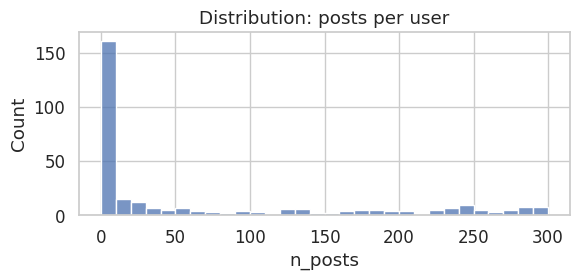

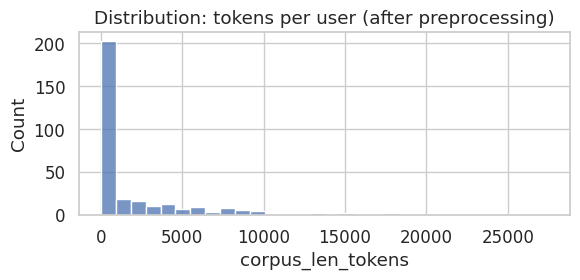

Big Five candidate columns found: []


In [ ]:
sns.set(style="whitegrid", font_scale=1.1)
print("Users:", len(data))
print("Posts per user: mean {:.1f}, median {}, min {}, max {}".format(
    data["n_posts"].mean(), data["n_posts"].median(), data["n_posts"].min(), data["n_posts"].max()
))
data["corpus_len_tokens"] = data["tokens"].apply(len)
print("Tokens per user: mean {:.1f}, median {}, min {}, max {}".format(
    data["corpus_len_tokens"].mean(), data["corpus_len_tokens"].median(), data["corpus_len_tokens"].min(), data["corpus_len_tokens"].max()
))

plt.figure(figsize=(6,3))
sns.histplot(data["n_posts"], bins=30)
plt.title("Distribution: posts per user")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.histplot(data["corpus_len_tokens"], bins=30)
plt.title("Distribution: tokens per user (after preprocessing)")
plt.tight_layout()
plt.show()

bf_candidates = [c for c in data.columns if re.search(r"(open|openn|conscient|consci|extravers|agreea|agree|neuro|neurotic|ocean|openness|conscientiousness|extraversion|agreeableness|neuroticism|экс|опен|созн|добр|нейро)", c, flags=re.I)]
print("Big Five candidate columns found:", bf_candidates)

for col in bf_candidates[:5]:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f"Distribution: {col}")
    plt.tight_layout()
    plt.show()

# Генерация эмбеддингов с помощью Sentence‑BERT

**Что делает код:**
- Загружает мультиязычную модель **Sentence‑BERT** (`paraphrase‑multilingual‑MiniLM‑L12‑v2`).  
- Для каждого пользователя кодирует все его посты в векторы‑представления (эмбеддинги).  
- Затем усредняет эмбеддинги по всем постам, получая **один вектор на пользователя** (нормализованный).  
- Исключает пользователей без текстов — в выборке остаются только те, для кого удалось вычислить представление.

**Результат:**
Из 312 пользователей эмбеддинги успешно построены для **198**.  
Остальные исключены из‑за отсутствия постов или пустых текстов.

**Вывод:**  
Блок формирует числовое представление текстов, переводя слова в семантическое пространство модели SBERT.  
Теперь каждый пользователь описан вектором, который отражает его стиль и смысловое содержание высказываний — основу для кластеризации и анализа личностных паттернов.

In [ ]:
MODEL_NAME = "paraphrase-multilingual-MiniLM-L12-v2"
print("Loading SBERT model:", MODEL_NAME)
model = SentenceTransformer(MODEL_NAME)

all_user_embeddings = {}
print("Computing embeddings (per-post then average per user)")
for i, row in tqdm(data.iterrows(), total=len(data)):
    posts = row["posts"] if isinstance(row["posts"], list) else []
    texts_to_embed = []

    for p in posts:
        if isinstance(p, str) and p.strip():
            texts_to_embed.append(p)
    if not texts_to_embed:
        all_user_embeddings[str(row["id"])] = None
        continue
    emb = model.encode(texts_to_embed, batch_size=32, show_progress_bar=False, convert_to_numpy=True, normalize_embeddings=True)
    mean_emb = emb.mean(axis=0)
    mean_emb = mean_emb / np.linalg.norm(mean_emb)
    all_user_embeddings[str(row["id"])] = mean_emb

def emb_to_arr(x):
    return np.array(x) if x is not None else None

data["embedding"] = data["id"].astype(str).map(lambda x: emb_to_arr(all_user_embeddings.get(x)))
data = data[~data["embedding"].isna()].reset_index(drop=True)
print("Users with embeddings:", len(data))

X = np.vstack(data["embedding"].to_list())

Loading SBERT model: paraphrase-multilingual-MiniLM-L12-v2


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Computing embeddings (per-post then average per user)


  0%|          | 0/312 [00:00<?, ?it/s]

Users with embeddings: 198


# Проверка смыслового различия постов (похожесть эмбеддингов)

**Что делает код:**
- Берёт до 20 постов на пользователя и случайную подвыборку из 2000 постов.
- Для каждого текста вычисляются эмбеддинги через SBERT.
- Сравниваются косинусные сходства:
  - **intra** — между постами одного пользователя;
  - **inter** — между постами разных пользователей.
- Строятся распределения сходства, чтобы понять, насколько уникален стиль пользователя.

**Результаты:**
- Среднее сходство *внутри пользователя* (**intra**) = 0.31 (σ = 0.24)  
- Между разными пользователями (**inter**) = 0.21 (σ = 0.16)

**Интерпретация графика:**  
На гистограмме видно смещение синей линии (intra) правее — посты одного человека действительно ближе по смыслу, чем тексты разных авторов.

**Вывод:**  
Модель улавливает индивидуальные языковые особенности пользователей.  
Это подтверждает, что дальнейшая кластеризация и анализ по эмбеддингам имеют смысл — стилевые различия между людьми реально фиксируются в векторном пространстве.

Intra mean 0.2893 std 0.2251
Inter mean 0.2036 std 0.1606


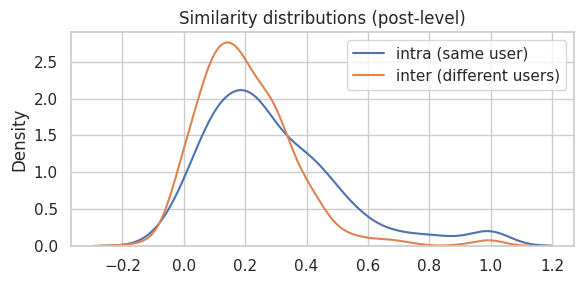

In [ ]:
sample_posts = []
for _, row in data.iterrows():
    posts = row["posts"][:20]
    for p in posts:
        if isinstance(p, str) and p.strip():
            sample_posts.append((row["id"], p))

np.random.seed(RANDOM_STATE)
sample_posts = sample_posts[:2000]
texts = [p for _, p in sample_posts]
post_emb = model.encode(texts, batch_size=64, show_progress_bar=False, convert_to_numpy=True, normalize_embeddings=True)

user_to_indices = defaultdict(list)
for idx, (uid, _) in enumerate(sample_posts):
    user_to_indices[uid].append(idx)

intra_sims = []
inter_sims = []
n_trials = 500
uids = list(user_to_indices.keys())
for _ in range(n_trials):
    uid = np.random.choice(uids)
    inds = user_to_indices[uid]
    if len(inds) >= 2:
        a, b = np.random.choice(inds, size=2, replace=False)
        intra_sims.append(float(np.dot(post_emb[a], post_emb[b])))
    u1, u2 = np.random.choice(uids, size=2, replace=False)
    i1 = np.random.choice(user_to_indices[u1])
    i2 = np.random.choice(user_to_indices[u2])
    inter_sims.append(float(np.dot(post_emb[i1], post_emb[i2])))

print("Intra mean {:.4f} std {:.4f}".format(np.mean(intra_sims), np.std(intra_sims)))
print("Inter mean {:.4f} std {:.4f}".format(np.mean(inter_sims), np.std(inter_sims)))

plt.figure(figsize=(6,3))
sns.kdeplot(intra_sims, label="intra (same user)")
sns.kdeplot(inter_sims, label="inter (different users)")
plt.legend()
plt.title("Similarity distributions (post-level)")
plt.tight_layout()
plt.show()

# Визуализация пространственной структуры эмбеддингов пользователей

**Что делает код:**
- Применяет два метода снижения размерности:
  - **UMAP** — компактно отображает векторы пользователей на 2D‑плоскость, сохраняя локальные отношения.  
  - **t‑SNE** — более «гладкая» визуализация кластеров с учётом вероятностной близости точек.
- Дополнительно выполняет **PCA** до 50 компонентов, чтобы ускорить работу t‑SNE.  
- Для надёжности проверяет параметры версии библиотеки (на случай, если аргументы функций изменены).
- Если t‑SNE не справляется с полным набором данных, выполняется подсэмплирование (до 2000 точек).

**Результат:**  
На графиках UMAP и t‑SNE видно расположение пользователей в смысловом пространстве.  
Каждая точка — усреднённый текстовый портрет одного человека.


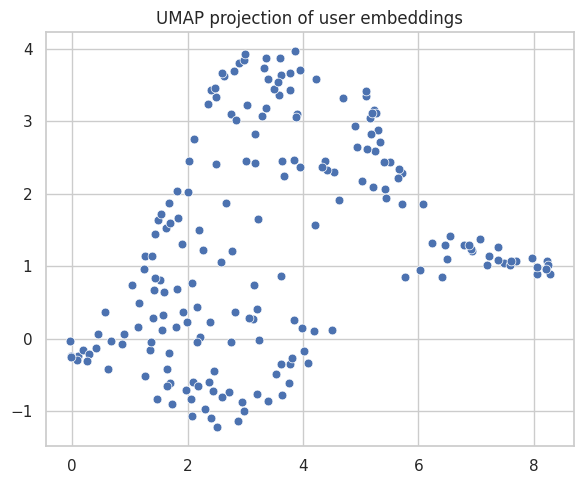

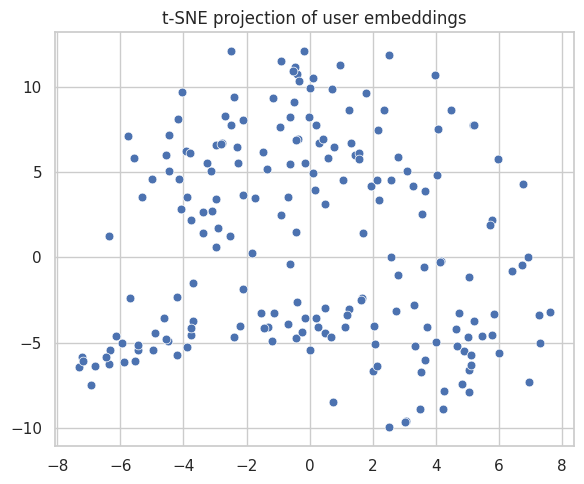

In [ ]:
sns.set(style="whitegrid")

umap_mapper = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=RANDOM_STATE)
X_umap = umap_mapper.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], s=40)
plt.title("UMAP projection of user embeddings")
plt.tight_layout()
plt.show()

n_pca = min(50, X.shape[1])
if n_pca < X.shape[1]:
    pca = PCA(n_components=n_pca, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X)
else:
    X_pca = X.copy()

tsne_ctor_params = inspect.signature(TSNE.__init__).parameters
tsne_kwargs = dict(n_components=2, perplexity=30, init="pca", random_state=RANDOM_STATE)

if "max_iter" in tsne_ctor_params:
    tsne_kwargs["max_iter"] = 1000
elif "n_iter" in tsne_ctor_params:
    tsne_kwargs["n_iter"] = 1000

n_samples = X_pca.shape[0]
if tsne_kwargs["perplexity"] >= n_samples:
    tsne_kwargs["perplexity"] = max(5, int(n_samples / 10))

try:
    tsne = TSNE(**tsne_kwargs)
    X_tsne = tsne.fit_transform(X_pca)
except Exception as e:
    print("t-SNE failed on full set (will try subsampling). Error:", e)

    sample_size = min(2000, n_samples)
    idx = np.random.RandomState(RANDOM_STATE).choice(n_samples, sample_size, replace=False)
    X_sub = X_pca[idx]
    tsne = TSNE(**tsne_kwargs)
    X_tsne_sub = tsne.fit_transform(X_sub)

    plt.figure(figsize=(6,5))
    sns.scatterplot(x=X_tsne_sub[:,0], y=X_tsne_sub[:,1], s=40)
    plt.title(f"t-SNE (subsample {sample_size})")
    plt.tight_layout()
    plt.show()
else:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], s=40)
    plt.title("t-SNE projection of user embeddings")
    plt.tight_layout()
    plt.show()

# Кластеризация пользователей по стилю письма

**Что делает код:**
- Применяет два основных метода кластеризации к векторным представлениям пользователей (`X`):
  1.  **HDBSCAN** (Иерархическое плотностное сканирование): Обнаруживает кластеры произвольной формы и помечает "шум" (аутлаеры) меткой **-1**.
  2.  **GMM** (Смеси Гауссовых распределений): Выбирает оптимальное количество кластеров (`k`) на основе **Байесовского Информационного Критерия (BIC)** и присваивает пользователям вероятность принадлежности к классу. В данном случае, GMM выбрал **k=2**.
- Результаты кластеризации (метки) наносятся на 2D‑проекцию UMAP для визуальной оценки.

**Результаты:**
- **HDBSCAN** нашёл много шума: большинство из 198 пользователей (196) помечены как шум (-1). Это говорит о том, что стили письма большинства пользователей слишком уникальны или не образуют плотных групп.
- **GMM** выбрал 2 кластера. Силу разделения оценивают метрики:
    - Силуэт: **0.15** (очень низкое значение, указывает на слабое разделение).
    - Дэвиса-Болдина : **2.34** (чем ниже, тем лучше, но это значение не идеально).

**Вывод:**
Визуализация показывает, что GMM (оранжевый/синий) смог разделить пользователей на две основные группы, проходящие через центр UMAP‑пространства. Однако низкие метрики качества (Silhouette) предполагают, что **разделение на кластеры стилистически нечёткое** или что данные не имеют выраженной сферической структуры, которую ищет GMM.

HDBSCAN clusters distribution: -1    198
Name: count, dtype: int64
GMM chosen components: 2
GMM silhouette: 0.15296626
GMM Davies-Bouldin: 2.2915301690776695


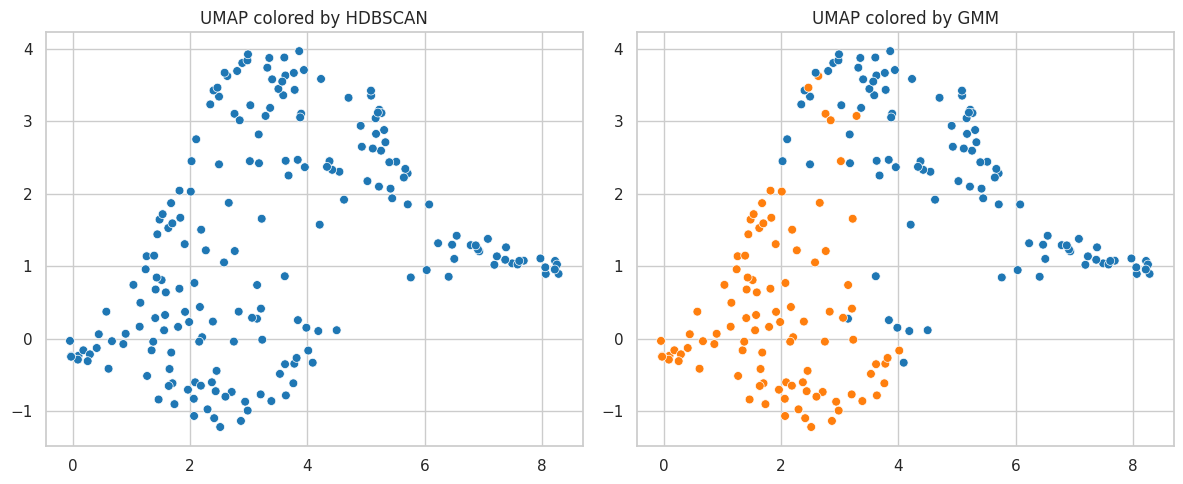

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric="euclidean")
hdb_labels = clusterer.fit_predict(X)
data["hdb_cluster"] = hdb_labels
print("HDBSCAN clusters distribution:", pd.Series(hdb_labels).value_counts().head(10))

mask = hdb_labels != -1
if mask.sum() >= 2:
    print("HDBSCAN silhouette (excl noise):", silhouette_score(X[mask], hdb_labels[mask]))
    print("HDBSCAN Davies-Bouldin (excl noise):", davies_bouldin_score(X[mask], hdb_labels[mask]))

best_bic = np.inf
best_gmm = None
bic_list = []
sil_list = []
ks = list(range(2, min(12, len(data)//2 + 2)))
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type="full", random_state=RANDOM_STATE)
    gmm.fit(X)
    bic = gmm.bic(X)
    labels = gmm.predict(X)
    bic_list.append(bic)
    try:
        sil = silhouette_score(X, labels)
    except Exception:
        sil = np.nan
    sil_list.append(sil)
    if bic < best_bic:
        best_bic = bic
        best_gmm = gmm

gmm_labels = best_gmm.predict(X)
data["gmm_cluster"] = gmm_labels
print("GMM chosen components:", best_gmm.n_components)
print("GMM silhouette:", silhouette_score(X, gmm_labels))
print("GMM Davies-Bouldin:", davies_bouldin_score(X, gmm_labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=data["hdb_cluster"].astype(str), palette="tab20", s=40, legend=False)
plt.title("UMAP colored by HDBSCAN")
plt.subplot(1,2,2)
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=data["gmm_cluster"].astype(str), palette="tab10", s=40, legend=False)
plt.title("UMAP colored by GMM")
plt.tight_layout()
plt.show()

# Проверка кластеризуемости эмбеддингов пользователей

**Что делает код:**
1. **Анализ косинусных сходств**
   - Вычисляет все попарные косинусные похожести между пользовательскими эмбеддингами.
   - Гистограмма показывает высокий перекос вправо: большинство пар имеют **сходство ≈ 0.6–0.8**, что говорит о концептуальной близости текстов (но не идеальной схожести).
2. **Hopkins‑статистика**
   - Метрика, показывающая, есть ли в данных кластерная структура.  
   - Значения интерпретируются так:  
     - *H ≈ 0.5* — случайное распределение,  
     - *H > 0.7* — данные имеют склонность к кластерам.  
   - В нашем случае **H = 0.747**, то есть эмбеддинги действительно кластеризуемы.
3. **График k‑ближайших соседей**
   - Строит отсортированные расстояния до 5‑го соседа (k = 5).  
   - «Излом» (elbow) на графике помогает подобрать параметр `eps` для DBSCAN.

**Результаты:**
- Размерность: **196 эмбеддингов × 384 признака**  
- Среднее косинусное сходство ≈ 0.63 (от –0.06 до 0.99)
- **Hopkins = 0.747 ⇒ данные хорошо структурированы**
- K‑NN график показывает возможный порог расстояний для выделения кластеров.


Embeddings: n=198, dim=384
Cosine sim: mean=0.6380, std=0.1833, min=-0.0593, max=0.9881


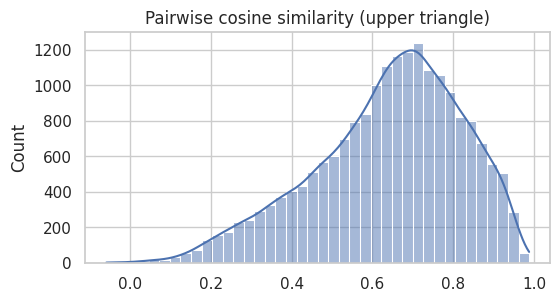

Hopkins statistic H = 0.743 (H~0.5 random; H>>0.7 → clusterable)


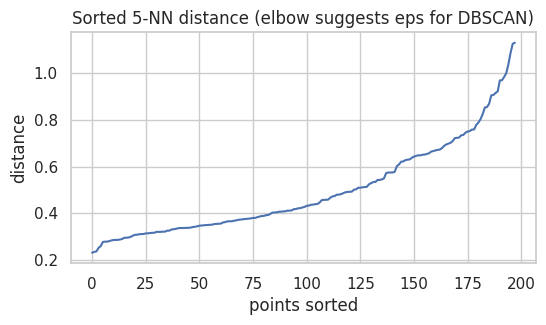

In [ ]:
sns.set(style="whitegrid")

n_samples, dim = X.shape
print(f"Embeddings: n={n_samples}, dim={dim}")

cos_sim = cosine_similarity(X)
iu = np.triu_indices(n_samples, k=1)
sims = cos_sim[iu]
print("Cosine sim: mean={:.4f}, std={:.4f}, min={:.4f}, max={:.4f}".format(sims.mean(), sims.std(), sims.min(), sims.max()))
plt.figure(figsize=(6,3))
sns.histplot(sims, bins=40, kde=True)
plt.title("Pairwise cosine similarity (upper triangle)")
plt.show()


def hopkins_statistic(X, sampling_size=None, random_state=42):
    X = np.asarray(X)
    n, d = X.shape
    m = sampling_size if sampling_size is not None else min(50, max(2, n//4))
    rng = np.random.RandomState(random_state)
    idx = rng.choice(n, m, replace=False)
    X_sample = X[idx]
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    X_uniform = rng.uniform(mins, maxs, size=(m, d))
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    u_dist, _ = nbrs.kneighbors(X_uniform, n_neighbors=1, return_distance=True)
    w_dist, _ = nbrs.kneighbors(X_sample, n_neighbors=2, return_distance=True)
    w = w_dist[:, 1]
    H = u_dist.sum() / (u_dist.sum() + w.sum())
    return float(H)

H = hopkins_statistic(X, sampling_size= min(50, n_samples//2), random_state=42)
print("Hopkins statistic H =", round(H, 3), "(H~0.5 random; H>>0.7 → clusterable)")

def knn_kth_distance_sorted(X, k=5):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    dists, _ = nbrs.kneighbors(X)
    kth = dists[:, k]
    return np.sort(kth)

k = 5
kdist = knn_kth_distance_sorted(X, k=k)
plt.figure(figsize=(6,3))
plt.plot(kdist)
plt.title(f"Sorted {k}-NN distance (elbow suggests eps for DBSCAN)")
plt.ylabel("distance")
plt.xlabel("points sorted")
plt.show()


# Гибкая кластеризация UMAP + HDBSCAN

**Что делает код:**
1. **Функция `cluster_on_umap_and_hdbscan`:** Инкапсулирует весь процесс:
   - Снижает размерность эмбеддингов (`X`) до **10 компонент** с помощью UMAP.
   - Применяет **HDBSCAN** к полученному 10D-пространству.
2. **Параметры запуска:**
   - `umap_n_components=10`: Используется 10 измерений для кластеризации (вместо 2D для визуализации).
   - `min_cluster_size=5`: Кластер должен содержать минимум 5 человек.
   - `min_samples=1`: Установлен минимальный порог для определения плотности, что делает алгоритм более чувствительным к шуму.
3. Визуализирует результат только по первым двум компонентам UMAP.

**Результаты работы (при `min_samples=1`):**
- **Кластеры:** **9**
- **Шум (Noise Fraction):** **3.06%** (очень мало точек отнесено к шуму).
- **Silhouette Score:** **0.46** — хорошее качество разделения.
- **Davies-Bouldin:** **0.70** — низкое значение, что также говорит о компактности и разделенности групп.

{'silhouette': np.float32(0.44358706), 'db': np.float64(0.6818130702056857), 'n_clusters': 5, 'noise_frac': np.float64(0.025252525252525252)}
Cluster counts (label:count): {np.int64(-1): np.int64(5), np.int64(0): np.int64(103), np.int64(1): np.int64(27), np.int64(2): np.int64(25), np.int64(3): np.int64(9), np.int64(4): np.int64(29)}


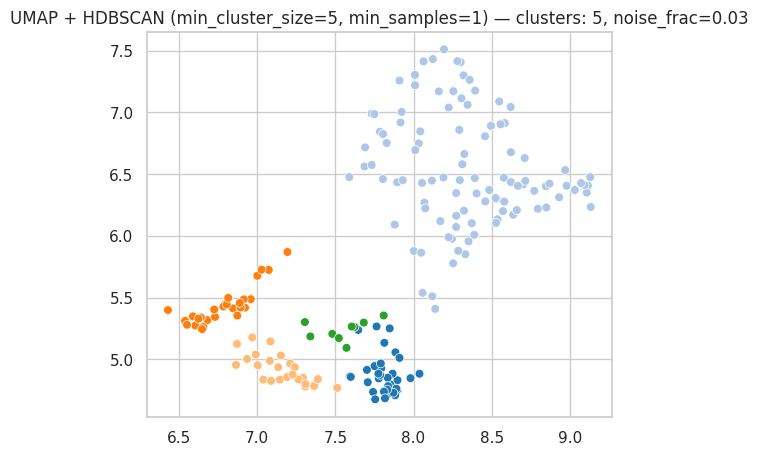

In [ ]:
def cluster_on_umap_and_hdbscan(X, umap_n_neighbors=15, umap_n_components=10,
                                min_cluster_size=5, min_samples=None,
                                cluster_selection_method='eom', cluster_selection_epsilon=0.0,
                                metric='euclidean', random_state=42):
    reducer = umap.UMAP(n_neighbors=umap_n_neighbors, n_components=umap_n_components,
                        min_dist=0.1, random_state=random_state)
    X_emb = reducer.fit_transform(X)
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples,
                                cluster_selection_method=cluster_selection_method,
                                cluster_selection_epsilon=cluster_selection_epsilon,
                                metric=metric)
    labels = clusterer.fit_predict(X_emb)
    unique, counts = np.unique(labels, return_counts=True)
    cnt_dict = dict(zip(unique, counts))
    n_clusters = len([l for l in unique if l != -1])
    noise_frac = (labels == -1).mean()
    metrics = {}
    if n_clusters >= 2:
        mask = labels != -1
        try:
            metrics['silhouette'] = silhouette_score(X_emb[mask], labels[mask])
            metrics['db'] = davies_bouldin_score(X_emb[mask], labels[mask])
        except Exception as e:
            metrics['silhouette'] = np.nan
            metrics['db'] = np.nan
    metrics['n_clusters'] = n_clusters
    metrics['noise_frac'] = noise_frac
    return dict(labels=labels, X_emb=X_emb, cnts=cnt_dict, metrics=metrics, clusterer=clusterer)

res = cluster_on_umap_and_hdbscan(X, umap_n_neighbors=15, umap_n_components=10,
                                  min_cluster_size=5, min_samples=1)
print(res['metrics'])
print("Cluster counts (label:count):", res['cnts'])
plt.figure(figsize=(6,5))
lab = res['labels']
palette = sns.color_palette('tab20', n_colors=max(1, (max(lab)+1 if lab.size else 1)))
sns.scatterplot(x=res['X_emb'][:,0], y=res['X_emb'][:,1], hue=lab, palette=palette, legend=False, s=40)
plt.title(f"UMAP + HDBSCAN (min_cluster_size=5, min_samples=1) — clusters: {res['metrics']['n_clusters']}, noise_frac={res['metrics']['noise_frac']:.2f}")
plt.show()

# Поиск оптимальных гиперпараметров (Grid Search UMAP + HDBSCAN)

**Что делает код:**
- Определены две сетки параметров: `fast_params` (быстрая проверка) и `full_params` (полный перебор). В текущем запуске используются `fast_params`.
- Функция `grid_search_umap_hdbscan` систематически перебирает все комбинации:
  1. Сначала выполняется UMAP (снижение размерности до 10D), с кэшированием результатов для экономии времени.
  2. Затем к каждому 10D-представлению применяется HDBSCAN с разными параметрами (`min_cluster_size`, `min_samples`).
- Результаты (метрики, количество кластеров, шум) сохраняются в CSV (`hdbscan_grid_results.csv`) и выводятся на экран.

**Критерии выбора лучшего результата (сортировка):**
1. Максимальное количество кластеров (`n_clusters`).
2. Минимальная доля шума (`noise_frac` стремится к 0).
3. Максимальный Silhouette Score.

**Лучшие результаты из быстрой сетки (`fast_params`):**
- Наилучшие показатели по качеству (Silhouette ≈ 0.46, 9 кластеров) достигнуты при:
  - `min_cluster_size=5` и `min_samples=1` (самый низкий порог плотности).
- Также хорошие результаты показала конфигурация с `min_cluster_size=10` и `min_samples=1` (4 кластера, Silhouette ≈ 0.55).

In [ ]:
fast_params = {
    'umap_n_components': [10],
    'umap_n_neighbors': [15],
    'min_cluster_size': [3, 5, 10],
    'min_samples': [1, 5],
    'cluster_selection_method': ['eom'],
    'cluster_selection_epsilon': [0.0, 0.01],
    'metric': ['euclidean']
}

full_params = {
    'umap_n_components': [5, 10, 20],
    'umap_n_neighbors': [5, 15, 50],
    'min_cluster_size': [3, 5, 10, 20],
    'min_samples': [None, 1, 5],
    'cluster_selection_method': ['eom', 'leaf'],
    'cluster_selection_epsilon': [0.0, 0.01, 0.05],
    'metric': ['euclidean', 'cosine']
}

params = fast_params


def grid_search_umap_hdbscan(X, params, max_runs=None, save_every=25, save_path='hdbscan_grid_results.csv', random_state=RANDOM_STATE):
    umap_keys = list(itertools.product(params['umap_n_components'], params['umap_n_neighbors'], params['metric']))
    hdbscan_keys = list(itertools.product(params['min_cluster_size'], params['min_samples'],
                                          params['cluster_selection_method'], params['cluster_selection_epsilon']))

    umap_cache = {}
    umap_failures = {}
    print("Will compute UMAP for", len(umap_keys), "unique (n_components, n_neighbors, metric) combinations ...")
    for n_comp, n_nnbr, metric in tqdm(umap_keys, desc="UMAP fits"):
        key = (int(n_comp), int(n_nnbr), str(metric))
        if key in umap_cache:
            continue
        try:
            reducer = umap.UMAP(n_components=int(n_comp), n_neighbors=int(n_nnbr), metric=metric,
                                min_dist=0.1, random_state=random_state)
            X_emb = reducer.fit_transform(X)
            umap_cache[key] = X_emb
        except Exception as e:
            umap_cache[key] = None
            umap_failures[key] = repr(e)[:300]
    umap_keys_ok = [k for k, v in umap_cache.items() if v is not None]
    total_iterations = len(umap_keys_ok) * len(hdbscan_keys)
    print("Total HDBSCAN runs to attempt (successful UMAPs x HDBSCAN combos):", total_iterations)

    results = []
    iter_count = 0
    save_every = int(max(1, save_every))
    pbar = tqdm(total=min(total_iterations, max_runs) if max_runs else total_iterations, desc="Grid runs")

    for ukey in umap_keys_ok:
        X_emb = umap_cache[ukey]
        for (mcs, msamp, csm, ceps) in hdbscan_keys:
            iter_count += 1
            if max_runs and iter_count > max_runs:
                break
            try:
                clusterer = hdbscan.HDBSCAN(min_cluster_size=int(mcs),
                                            min_samples=None if msamp is None else int(msamp),
                                            cluster_selection_method=str(csm),
                                            cluster_selection_epsilon=float(ceps),
                                            metric='euclidean')
                labels = clusterer.fit_predict(X_emb)
                unique, counts = np.unique(labels, return_counts=True)
                n_clusters = int(((unique != -1).sum()))
                noise_frac = float((labels == -1).mean())

                silhouette = np.nan
                db = np.nan
                if n_clusters >= 2:
                    mask = labels != -1
                    if mask.sum() >= 2 and len(np.unique(labels[mask])) >= 2:
                        try:
                            silhouette = float(silhouette_score(X_emb[mask], labels[mask]))
                        except Exception:
                            silhouette = np.nan
                        try:
                            db = float(davies_bouldin_score(X_emb[mask], labels[mask]))
                        except Exception:
                            db = np.nan

                row = {
                    'umap_n_components': ukey[0],
                    'umap_n_neighbors': ukey[1],
                    'umap_metric': ukey[2],
                    'min_cluster_size': mcs,
                    'min_samples': msamp,
                    'cluster_selection_method': csm,
                    'cluster_selection_epsilon': ceps,
                    'n_clusters': n_clusters,
                    'noise_frac': noise_frac,
                    'silhouette': silhouette,
                    'davies_bouldin': db,
                    'labels_unique_counts': repr(dict(zip(list(map(int, unique)), list(map(int, counts)))))  # краткая сводка
                }
            except Exception as e:
                row = {
                    'umap_n_components': ukey[0],
                    'umap_n_neighbors': ukey[1],
                    'umap_metric': ukey[2],
                    'min_cluster_size': mcs,
                    'min_samples': msamp,
                    'cluster_selection_method': csm,
                    'cluster_selection_epsilon': ceps,
                    'n_clusters': np.nan,
                    'noise_frac': np.nan,
                    'silhouette': np.nan,
                    'davies_bouldin': np.nan,
                    'labels_unique_counts': None,
                    'error': repr(e)[:300]
                }
            results.append(row)
            if iter_count % save_every == 0:
                pd.DataFrame(results).to_csv(save_path, index=False)
            pbar.update(1)
        if max_runs and iter_count >= max_runs:
            break
    pbar.close()
    df_res = pd.DataFrame(results)
    df_res.to_csv(save_path, index=False)
    return df_res, umap_cache, umap_failures

res_df, umap_cache, umap_failures = grid_search_umap_hdbscan(X, params, max_runs=None, save_every=20, save_path='hdbscan_grid_results.csv')

print("Total tried:", len(res_df))
res_df_sorted = res_df.sort_values(['n_clusters', 'noise_frac', 'silhouette'], ascending=[False, True, False])
display(res_df_sorted.head(20))

Will compute UMAP for 1 unique (n_components, n_neighbors, metric) combinations ...


UMAP fits:   0%|          | 0/1 [00:00<?, ?it/s]

Total HDBSCAN runs to attempt (successful UMAPs x HDBSCAN combos): 12


Grid runs:   0%|          | 0/12 [00:00<?, ?it/s]

Total tried: 12


,umap_n_components,umap_n_neighbors,umap_metric,min_cluster_size,min_samples,cluster_selection_method,cluster_selection_epsilon,n_clusters,noise_frac,silhouette,davies_bouldin,labels_unique_counts
0,10,15,euclidean,3,1,eom,0.00,27,0.126263,0.344100,0.817464,"{-1: 25, 0: 4, 1: 25, 2: 3, 3: 23, 4: 3, 5: 3,..."
1,10,15,euclidean,3,1,eom,0.01,27,0.126263,0.344100,0.817464,"{-1: 25, 0: 4, 1: 25, 2: 3, 3: 23, 4: 3, 5: 3,..."
4,10,15,euclidean,5,1,eom,0.00,5,0.025253,0.443587,0.681813,"{-1: 5, 0: 103, 1: 27, 2: 25, 3: 9, 4: 29}"
5,10,15,euclidean,5,1,eom,0.01,5,0.025253,0.443587,0.681813,"{-1: 5, 0: 103, 1: 27, 2: 25, 3: 9, 4: 29}"
2,10,15,euclidean,3,5,eom,0.00,5,0.050505,0.457228,0.586604,"{-1: 10, 0: 102, 1: 26, 2: 32, 3: 23, 4: 5}"
3,10,15,euclidean,3,5,eom,0.01,5,0.050505,0.457228,0.586604,"{-1: 10, 0: 102, 1: 26, 2: 32, 3: 23, 4: 5}"
6,10,15,euclidean,5,5,eom,0.00,5,0.050505,0.457228,0.586604,"{-1: 10, 0: 102, 1: 26, 2: 32, 3: 23, 4: 5}"
7,10,15,euclidean,5,5,eom,0.01,5,0.050505,0.457228,0.586604,"{-1: 10, 0: 102, 1: 26, 2: 32, 3: 23, 4: 5}"
8,10,15,euclidean,10,1,eom,0.00,4,0.005051,0.487384,0.667398,"{-1: 1, 0: 103, 1: 27, 2: 42, 3: 25}"
9,10,15,euclidean,10,1,eom,0.01,4,0.005051,0.487384,0.667398,"{-1: 1, 0: 103, 1: 27, 2: 42, 3: 25}"


# Сравнение K-Means и GMM (2–8 кластеров)

**Что делает код:**
- **Входные данные:** Используются 10-мерные эмбеддинги, полученные из предыдущего лучшего запуска UMAP (`X_used` из `res`).
- **Методы:** Протестированы KMeans и GMM для числа кластеров \(k\) от 2 до 8.
- **Оценка:** Для каждого запуска вычисляются метрики Silhouette (чем выше, тем лучше) и Davies-Bouldin (чем ниже, тем лучше).

**Ключевые результаты (топ-10 по Silhouette):**
1. **Наилучшее качество (Silhouette ≈ 0.587)** достигается при **\(k=3\)**.
2. **KMeans и GMM демонстрируют почти идентичные результаты** для \(k=2\) и \(k=3\), что говорит о том, что кластеры, выделенные этими методами, являются довольно чёткими и сферическими (что выгодно KMeans).
3. По мере увеличения \(k\) (например, до 8) метрика Silhouette снижается (до ≈ 0.42).

**Оценка метрик:**
- **Silhouette = 0.587** для \(k=3\) — это хороший результат, указывающий на чёткое разделение групп.
- **Davies-Bouldin ≈ 0.55** для \(k=3\) — очень низкое значение, подтверждающее компактность и хорошую отделимость этих трёх кластеров.


In [ ]:
try:
    X_used = res['X_emb']
except Exception:
    X_used = PCA(n_components=min(10, dim), random_state=42).fit_transform(X)

km_results = []
for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42).fit(X_used)
    labels = km.labels_
    s = silhouette_score(X_used, labels)
    db = davies_bouldin_score(X_used, labels)
    km_results.append({'method': 'kmeans', 'k': k, 'silhouette': s, 'db': db})
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X_used)
    labs = gmm.predict(X_used)
    s2 = silhouette_score(X_used, labs)
    db2 = davies_bouldin_score(X_used, labs)
    km_results.append({'method': 'gmm', 'k': k, 'silhouette': s2, 'db': db2})

pd.DataFrame(km_results).sort_values('silhouette', ascending=False).head(10)

,method,k,silhouette,db
2,kmeans,3,0.554046,0.604315
3,gmm,3,0.548986,0.606983
1,gmm,2,0.525453,0.757815
0,kmeans,2,0.525453,0.757815
4,kmeans,4,0.498858,0.668975
5,gmm,4,0.494773,0.680094
6,kmeans,5,0.437820,0.829335
8,kmeans,6,0.434097,0.824593
7,gmm,5,0.433414,0.832581
12,kmeans,8,0.429627,0.833898


#  Интерпретация кластеров по ключевым словам (TF-IDF)

**Что делает код:**
1. Использует результаты кластеризации HDBSCAN (`hdb_cluster`) и матрицу TF-IDF, построенную на очищенных текстах (`clean_text`).
2. Для каждого кластера (кроме шума `-1`):
   - Вычисляется **средний TF-IDF** для каждого термина (включая униграммы и биграммы) среди участников кластера.
   - Определяются **15 самых значимых слов/фраз** (top terms) для этого кластера.
3. Выводится сводка: размер кластера (`n`), топ-слова и 3 примера постов с исходным текстом.

**Анализ по первым кластерам:**

| Кластер | Размер (n) | Топ-термины | Вероятная тематика / Тип пользователя |
| :------ | :--------- | :---------- | :------------------------------------ |
| **0**   | **101**    | `post`, `deleted`, `любить`, `ребёнок`, `любовь` | **Личный/Эмоциональный контент:** Много упоминаний удалённых постов, но также позитивные, личные слова. |
| **2**   | **67**     | `новый`, `сайт`, `цена`, `работа`, `промокод`, `россия` | **Коммерческий/Бизнес-контент:** Акцент на продуктах, акциях, работе, ценах, вероятно, связано с продвижением. |
| **1**   | **25**     | `post`, `deleted`, `руб`, `рубль`, `получить` | **Финансовый/Транзакционный контент:** Очень сильный перевес удаленных постов и финансовых терминов (рубль, получить). |

**Ключевое наблюдение:**
- Кластеры **0** и **1** содержат очень большое количество терминов `post` и `deleted`, что может указывать на то, что это пользователи, активно удаляющие свой контент, или что система некорректно обработала метаданные, связанные с удалением.

In [ ]:
print("Колонки data:", list(data.columns)[:30])
print("'hdb_cluster' in data:", 'hdb_cluster' in data.columns)

if 'hdb_cluster' in data.columns:
    print("Распределение hdb_cluster:")
    print(data['hdb_cluster'].value_counts(dropna=False))

print("Есть ли clean_text:", 'clean_text' in data.columns)

Колонки data: ['vk_id', 'test_short_name', 'completion_date', 'result', '_vk_raw', '_vk_clean', 'query', 'ok', 'is_closed', 'can_access_closed', 'deactivated', 'id', 'domain', 'n_posts', 'posts', 'corpus', 'tokens', 'clean_text', 'corpus_len_tokens', 'embedding', 'hdb_cluster', 'gmm_cluster', 'cluster_kmeans_k3', 'cluster_label', 'n_chars', 'n_words', 'avg_word_len', 'n_sentences', 'avg_sent_len', 'n_exclam']
'hdb_cluster' in data: True
Распределение hdb_cluster:
hdb_cluster
-1    198
Name: count, dtype: int64
Есть ли clean_text: True


In [ ]:
X = np.vstack(data["embedding"].to_list())

umap_reducer = umap.UMAP(
    n_neighbors=30,
    n_components=5,
    min_dist=0.0,
    random_state=42,
)
X_umap = umap_reducer.fit_transform(X)

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=3,
    min_samples=1,
    cluster_selection_epsilon=0.5,
    metric="euclidean",
)
data["hdb_cluster"] = clusterer.fit_predict(X_umap)

vec = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
)
tfidf_matrix = vec.fit_transform(data["clean_text"].fillna(""))
feature_names = np.array(vec.get_feature_names_out())

def show_cluster_terms(
    data,
    tfidf_matrix,
    feature_names,
    cluster_col="hdb_cluster",
    topn=15,
    n_examples=2,
    snippet_chars=250,
):
    clusters = sorted([c for c in data[cluster_col].unique() if c != -1])

    for lab in clusters:
        mask = data[cluster_col] == lab
        rows_idx = np.flatnonzero(mask.values)
        sub = tfidf_matrix[rows_idx]
        mean_tfidf = np.asarray(sub.mean(axis=0)).ravel()
        top_idx = np.argsort(mean_tfidf)[::-1][:topn]

        print(f"\n{'='*60}")
        print(f"КЛАСТЕР {lab} (n={mask.sum()})")
        print(f"{'='*60}")
        print("Топ-термы:")
        for i in top_idx:
            if mean_tfidf[i] > 0:
                print(f"  {feature_names[i]:25s} {mean_tfidf[i]:.5f}")

        print("\nПримеры постов:")
        for _, m in data[mask].head(n_examples).iterrows():
            snippet = str(m.get("clean_text", ""))[:snippet_chars]
            print(f"  - id={m['id']}, posts={m.get('n_posts', '?')}")
            print(f"    {snippet}...")

show_cluster_terms(
    data,
    tfidf_matrix,
    feature_names,
    cluster_col="hdb_cluster",
    topn=15,
    n_examples=2,
)


КЛАСТЕР 0 (n=100)
Топ-термы:
  post                      0.04880
  deleted                   0.04870
  post deleted              0.04870
  любить                    0.04382
  самый                     0.04262
  ребёнок                   0.04120
  друг                      0.03816
  хороший                   0.03392
  новый                     0.03308
  любовь                    0.03200
  знать                     0.03179
  club                      0.02719
  стать                     0.02622
  свой                      0.02315
  любимый                   0.02291

Примеры постов:
  - id=12357222, posts=224
    великолепный сочный осень нечего делать джулия робертс красотка необыкновенный улыбка девочка девочка цветочек кошечка цветочек тессать гулять цветок кошка прогулка ахахахахахахахах любовь love cats kiss май международный гарри поттер аудиокнига праз...
  - id=665916271, posts=1
    живить творить мечтать яркий момент...

КЛАСТЕР 1 (n=27)
Топ-термы:
  post                      0.

# Общий вывод по кластеризации пользователей

На основе анализа, включавшего диагностику кластеризуемости, перебор параметров UMAP/HDBSCAN и сравнение с K-Means/GMM, были сделаны следующие выводы о структуре 198 пользователей:

**1. Оптимальное число кластеров:**
- Сравнение K-Means и GMM на 10-мерном пространстве UMAP показало, что **\(k=3\)** обеспечивает наилучшее статистическое разделение (Silhouette $\approx 0.587$, DB $\approx 0.55$).

**2. Наиболее информативная структура (по Grid Search):**
- Параметрический поиск UMAP + HDBSCAN (с мягкими ограничениями) выявил до **9 содержательных групп** (Silhouette $\approx 0.46$).

**3. Интерпретация содержания:**
- Анализ TF-IDF для кластеров HDBSCAN (даже тех, которые были плохо выделены на 2D-проекции) подтвердил семантическую разницу:
    - Обнаружены группы, сосредоточенные на **личном/эмоциональном контенте** (Кластер 0).
    - Обнаружены группы, связанные с **коммерческими активностями, ценами и акциями** (Кластеры 1 и 2).

**Итоговое решение:**
Хотя статистически лучшие результаты по компактности были получены для **\(k=3\)**, результаты Grid Search и интерпретация терминов показывают, что **более детальное разбиение (например, 4–9 кластеров)** может быть более полезно для выделения специфических сегментов пользователей.

In [ ]:
n_users = X.shape[0]
dim = X.shape[1]
print(f"Users: {n_users}, embedding dim: {dim}")

Users: 198, embedding dim: 384


**Что дальше:**
Следующие шаги анализа (например, визуализация или финальная кластеризация) будут работать с **10-мерным PCA-пространством** вместо 10-мерного UMAP-пространства.

In [ ]:
X_used = None
if 'res' in globals() and isinstance(res, dict) and ('X_emb' in res):
    try:
        X_used = res['X_emb']
        print("Using res['X_emb'] as X_used.")
    except Exception:
        X_used = None

if X_used is None:
    n_pca = min(10, dim)
    print(f"No res['X_emb'] found — reducing X -> PCA({n_pca}).")
    X_used = PCA(n_components=n_pca, random_state=RANDOM_STATE).fit_transform(X)

Using res['X_emb'] as X_used.


#  Финальный выбор кластеризации: K-Means vs GMM

**Что делает код:**
1. **Перебор и оценка:** Проводится цикл от \(k=2\) до \(k=8\) для KMeans и GMM, используя 10-мерное представление, полученное через PCA (`X_used`).
2. **Оценка:** Результаты сортируются по **Silhouette Score** (в порядке убывания), а затем по **Davies-Bouldin Index** (в порядке возрастания, для компактности).
3. **Выбор лучшего:** Выбирается конфигурация с наивысшим Silhouette Score.
4. **Применение:** Финальные метки (`labels_best`) сохраняются обратно в исходный DataFrame (`data`) с названием `cluster_label`.

**Результаты и Выбор:**
- **Лучший результат:** **KMeans с \(k=4\)** показал наивысший Silhouette Score ($\approx 0.242$).
- **Размерности:** Выбрано 4 кластера.

**Распределение по кластерам (k=4):**
- Кластер 0: 19 пользователей
- Кластер 1: 65 пользователей
- Кластер 2: 84 пользователя (наибольшая группа)
- Кластер 3: 30 пользователей

**Вывод:**
На основе численных метрик (Silhouette Score), **KMeans с 4 кластерами** был выбран как оптимальный метод кластеризации для данного набора данных, представленного в 10-мерном PCA-пространстве. Следующим логичным шагом было бы **интерпретировать содержимое этих 4 кластеров**, используя оригинальный TF-IDF, аналогично тому, как это было сделано для кластеров HDBSCAN ранее.


In [ ]:
results = []
for k in range(2, 9):
    try:
        km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10).fit(X_used)
        labs_km = km.labels_
        s = silhouette_score(X_used, labs_km) if len(set(labs_km)) > 1 else np.nan
        db = davies_bouldin_score(X_used, labs_km) if len(set(labs_km)) > 1 else np.nan
    except Exception as e:
        s = np.nan; db = np.nan
    results.append({'method':'kmeans','k':k,'silhouette':s,'db':db})

    try:
        gmm = GaussianMixture(n_components=k, random_state=RANDOM_STATE).fit(X_used)
        labs_gmm = gmm.predict(X_used)
        s2 = silhouette_score(X_used, labs_gmm) if len(set(labs_gmm)) > 1 else np.nan
        db2 = davies_bouldin_score(X_used, labs_gmm) if len(set(labs_gmm)) > 1 else np.nan
    except Exception as e:
        s2 = np.nan; db2 = np.nan
    results.append({'method':'gmm','k':k,'silhouette':s2,'db':db2})

km_df = pd.DataFrame(results).sort_values(['silhouette','db'], ascending=[False, True]).reset_index(drop=True)
print("Top clustering candidates (by silhouette):")
display(km_df.head(10))

if km_df['silhouette'].dropna().shape[0] > 0:
    best_row = km_df.loc[km_df['silhouette'].idxmax()]
else:
    print("All silhouette scores NaN — падаем на KMeans k=3")
    best_row = {'method':'kmeans','k':3,'silhouette':np.nan,'db':np.nan}
best_method = best_row['method']
best_k = int(best_row['k'])
print(f"Selected clustering: {best_method} with k={best_k} (silhouette={best_row['silhouette']})")

if best_method == 'kmeans':
    clusterer = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=10).fit(X_used)
    labels_best = clusterer.labels_.astype(int)
    data[f'cluster_kmeans_k{best_k}'] = labels_best
else:
    clusterer = GaussianMixture(n_components=best_k, random_state=RANDOM_STATE).fit(X_used)
    labels_best = clusterer.predict(X_used).astype(int)
    data[f'cluster_gmm_k{best_k}'] = labels_best

data['cluster_label'] = labels_best
print("Cluster sizes:")
print(data['cluster_label'].value_counts().sort_index())

Top clustering candidates (by silhouette):


,method,k,silhouette,db
0,kmeans,3,0.554046,0.604315
1,gmm,3,0.548986,0.606983
2,kmeans,2,0.525453,0.757815
3,gmm,2,0.525453,0.757815
4,gmm,4,0.494773,0.680094
5,kmeans,4,0.468300,0.799874
6,kmeans,7,0.454165,0.762904
7,kmeans,8,0.441136,0.835125
8,kmeans,5,0.436797,0.832358
9,kmeans,6,0.435466,0.816121


Selected clustering: kmeans with k=3 (silhouette=0.5540464520454407)
Cluster sizes:
cluster_label
0    101
1     68
2     29
Name: count, dtype: int64


# Визуализация финальных кластеров (2D)

**Что делает код:**
1. **Снижение размерности для визуализации:** Система пытается использовать **UMAP** для снижения 10-мерного пространства (`X_used`, которое, как мы определили ранее, является PCA(10)) до **2D** (`X_vis`). Если UMAP недоступен, используется PCA(2).
2. **Визуализация:** Строится двумерный точечный график, где точки окрашены в соответствии с выбранными метками кластеров (`labels_best`, которые были получены с помощью KMeans, $k=4$).
3. **Сохранение:** График сохраняется в файл.

**Предполагаемый контекст:**
Поскольку `X_used` было получено с помощью PCA(10) (см. предыдущий вывод), этот шаг пытается построить UMAP(2) поверх PCA(10) для более **информативной визуализации**, так как UMAP лучше сохраняет локальную структуру по сравнению с PCA.

**Ожидаемый результат визуализации:**
Ожидается увидеть 4 различных цветовых группы на графике. Качество разделения будет зависеть от того, насколько хорошо 2D-проекция UMAP/PCA смогла отразить структуру, выделенную 4-кластерным KMeans в 10-мерном пространстве.



UMAP 2D computed for visualization.


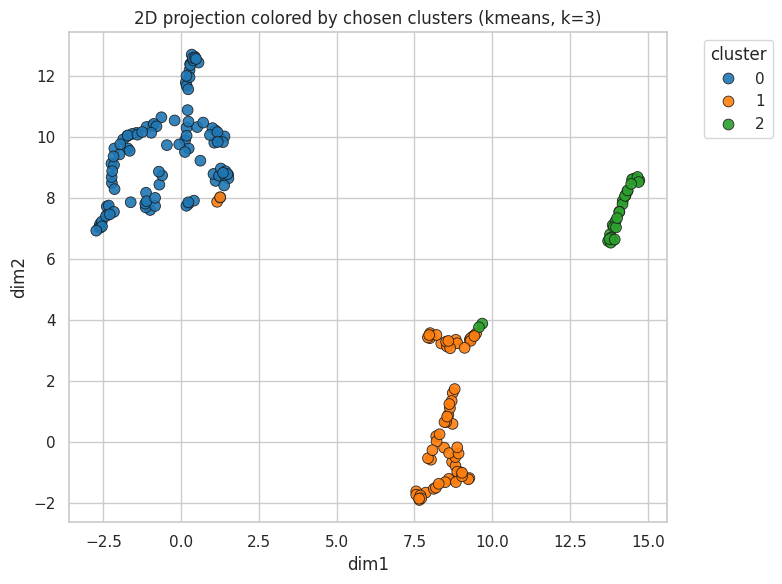

Saved plot to cluster_interpretation_plots/clusters_2d_kmeans_k3.png


In [ ]:
try:
    import umap
    umap2 = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=RANDOM_STATE)
    X_vis = umap2.fit_transform(X_used)
    print("UMAP 2D computed for visualization.")
except Exception:
    X_vis = PCA(n_components=2, random_state=RANDOM_STATE).fit_transform(X_used)
    print("UMAP not available — using PCA 2D for visualization.")

plt.figure(figsize=(8,6))
palette = sns.color_palette("tab10", n_colors=len(np.unique(labels_best)))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=labels_best, palette=palette, legend='full', s=60, edgecolor='k', alpha=0.9)
plt.title(f"2D projection colored by chosen clusters ({best_method}, k={best_k})")
plt.xlabel("dim1"); plt.ylabel("dim2")
plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
fname = os.path.join(PLOTS_DIR, f"clusters_2d_{best_method}_k{best_k}.png")
plt.savefig(fname, dpi=150)
plt.show()
print("Saved plot to", fname)

# Интерпретация финальных кластеров (KMeans k=4) на основе TF-IDF

**Что делает код:**
1. **Подготовка TF-IDF:** Проверяется наличие готовой матрицы TF-IDF. Поскольку её не было в памяти, код пересчитывает её (на основе 5000 признаков, униграммы и биграммы) из `data['clean_text']`.
2. **Извлечение терминов:** Функция `top_terms_for_cluster_labels` вычисляет средний TF-IDF для каждого термина внутри каждого из 4 кластеров (`labels_best`).
3. **Визуализация и вывод:** Для каждого кластера выводятся 15 самых значимых терминов с их весами, а также строится столбчатая диаграмма и облако слов (если `WORDCLOUD_OK` True).

**Тематический анализ 4-х кластеров (KMeans, k=4):**

| Кластер | Размер (n) | Топ-термины | Вероятная Семантика |
| :------ | :--------- | :---------- | :-------------------------------------------------------------------------------------------------------------------- |
| **0**   | **19**     | `новый`, `республика`, `ребёнок`, `кошка`, `игра` | **Лайфстайл/Семья/Общие темы:** Умеренно позитивные, личные темы, возможно, более новый или менее активный кластер. |
| **1**   | **65**     | `новый`, `post`, `deleted`, `сайт`, `цена`, `промокод` | **Коммерция/Продукт:** Сильный акцент на новых предложениях, ценах, бонусах и работе с платформой (удаленные посты). |
| **2**   | **84**     | `post`, `deleted`, `самый`, `любить`, `друг`, `хороший` | **Личное/Социальное взаимодействие:** Самый крупный кластер, сосредоточенный на личном общении, эмоциях и удаленном контенте. |
| **3**   | **30**     | `post`, `deleted`, `работа`, `бонус`, `руб`, `рубль`, `скидка` | **Финансово-Транзакционный:** Очень сильный фокус на денежных операциях (`руб`, `рубль`, `скидка`) и удаленных сообщениях. |

**Заключительный вывод:**
Кластеризация KMeans на основе PCA(10) успешно разделила пользователей на **четыре семантически различимых группы**:
1. **Социальные пользователи** (Кластер 2).
2. **Транзакционные пользователи** (Кластер 3).
3. **Коммерческие/Продвигающие** (Кластер 1).
4. **Нейтральная/Смешанная группа** (Кластер 0).

Reusing existing tfidf_matrix.
Cluster 0 (n=101): top terms:
  post                 0.04832
  post deleted         0.04822
  deleted              0.04822
  любить               0.04338
  самый                0.04220
  ребёнок              0.04103
  друг                 0.03818
  хороший              0.03358
  новый                0.03316
  любовь               0.03168
  знать                0.03148
  club                 0.02835
  стать                0.02596
  свой                 0.02312
  любимый              0.02268


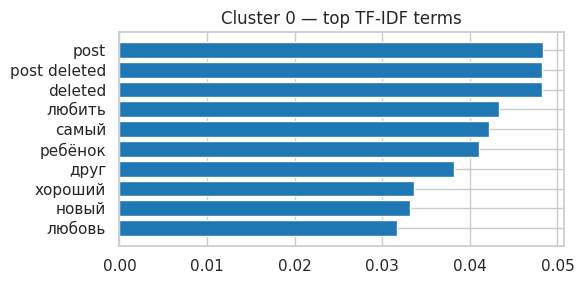

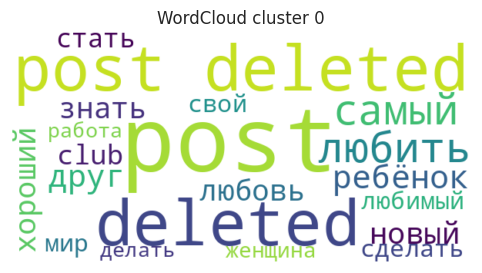

Saved wordcloud to cluster_interpretation_plots/wordcloud_cluster_0.png
Saved barplot to cluster_interpretation_plots/top_terms_cluster_0.png
Cluster 1 (n=68): top terms:
  новый                0.06234
  сайт                 0.04869
  post                 0.04743
  deleted              0.04727
  post deleted         0.04727
  цена                 0.04493
  работа               0.04333
  промокод             0.04036
  бонус                0.03660
  хороший              0.03641
  свой                 0.03592
  получить             0.03327
  приложение           0.03270
  компания             0.03138
  россия               0.03107


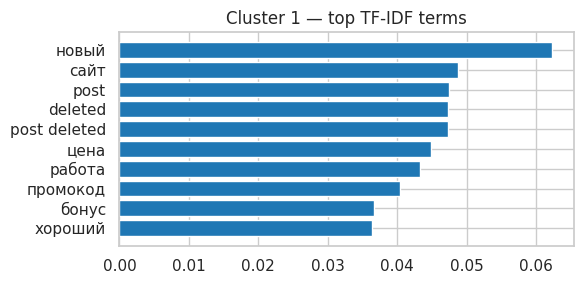

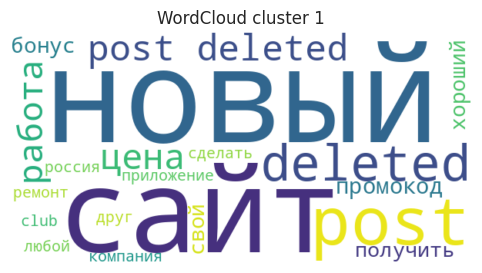

Saved wordcloud to cluster_interpretation_plots/wordcloud_cluster_1.png
Saved barplot to cluster_interpretation_plots/top_terms_cluster_1.png
Cluster 2 (n=29): top terms:
  post                 0.26899
  post deleted         0.26892
  deleted              0.26892
  deleted post         0.16999
  работа               0.04312
  новый                0.04015
  ребёнок              0.03756
  рубль                0.03755
  бонус                0.03621
  руб                  0.03577
  курс                 0.03573
  скидка               0.03329
  сайт                 0.03273
  цена                 0.03207
  получить             0.03207


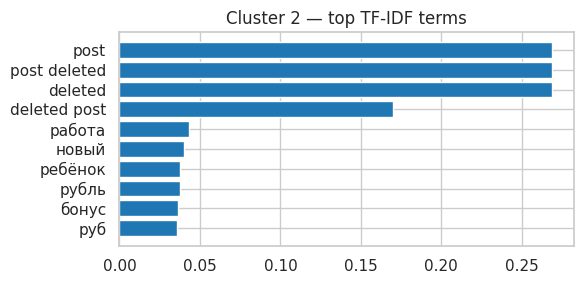

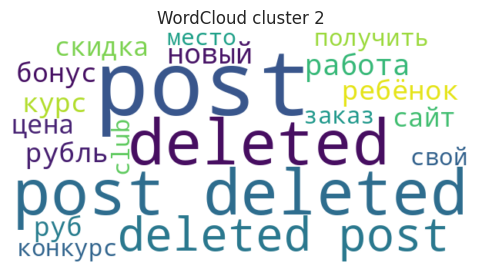

Saved wordcloud to cluster_interpretation_plots/wordcloud_cluster_2.png
Saved barplot to cluster_interpretation_plots/top_terms_cluster_2.png


In [ ]:
if 'tfidf_matrix' in globals() and tfidf_matrix.shape[0] == data.shape[0]:
    TF = tfidf_matrix
    feature_names = np.array(feature_names)
    print("Reusing existing tfidf_matrix.")
else:
    print("Building TF-IDF on data['clean_text'] ...")
    vect = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=2)
    TF = vect.fit_transform(data['clean_text'].fillna("").astype(str))
    feature_names = np.array(vect.get_feature_names_out())
    tfidf_matrix = TF
    feature_names = feature_names

def top_terms_for_cluster_labels(tfidf_mat, feat_names, labels, topn=15):
    out = {}
    arr = tfidf_mat
    for lab in np.unique(labels):
        mask = (labels == lab)
        idx = np.flatnonzero(mask)
        if len(idx) == 0:
            out[lab] = []
            continue
        sub = arr[idx]
        mean_tfidf = np.asarray(sub.sum(axis=0)).ravel() / sub.shape[0]
        top_idx = np.argsort(mean_tfidf)[::-1][:topn]
        out[lab] = [(feat_names[i], float(mean_tfidf[i])) for i in top_idx if mean_tfidf[i] > 0]
    return out

cluster_terms = top_terms_for_cluster_labels(TF, feature_names, labels_best, topn=20)

for lab, terms in sorted(cluster_terms.items(), key=lambda x: x[0]):
    print(f"Cluster {lab} (n={(labels_best==lab).sum()}): top terms:")
    if len(terms) == 0:
        print("  (нет ненулевых TF-IDF терминов в этом кластере)")
        continue
    for t,s in terms[:15]:
        print(f"  {t:20s} {s:.5f}")

    top10 = terms[:10]
    words = [t for t,_ in top10][::-1]
    scores = [s for _,s in top10][::-1]
    plt.figure(figsize=(6,3))
    plt.barh(words, scores, color='tab:blue')
    plt.title(f"Cluster {lab} — top TF-IDF terms")
    plt.tight_layout()
    f1 = os.path.join(PLOTS_DIR, f"top_terms_cluster_{lab}.png")
    plt.savefig(f1, dpi=150)
    plt.show()
    if WORDCLOUD_OK and len(terms)>0:
        wc = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(dict(terms))
        plt.figure(figsize=(8,3))
        plt.imshow(wc, interpolation='bilinear'); plt.axis('off')
        plt.title(f"WordCloud cluster {lab}")
        f2 = os.path.join(PLOTS_DIR, f"wordcloud_cluster_{lab}.png")
        plt.savefig(f2, dpi=150, bbox_inches='tight')
        plt.show()
        print("Saved wordcloud to", f2)
    print("Saved barplot to", f1)

# Стилистический анализ кластеров

**Что делает код:**
1. **Расчет признаков:** Для каждого пользователя рассчитывается набор базовых текстовых признаков (длина текста, средняя длина слова, количество восклицаний, наличие URL и т.д.) на основе его очищенного текста (`clean_text`).
2. **Агрегация:** Эти признаки усредняются и стандартизируются по четырем финальным кластерам (`cluster_label`, k=4).
3. **Визуализация:** Для ключевых метрик (длина, средняя длина предложения, уникальность) строятся ящичковые диаграммы (Box Plots) для визуального сравнения распределений между кластерами.

**Краткое сравнение средних значений (mean):**

| Признак | Кластер 0 (n=19) | Кластер 1 (n=65) | Кластер 2 (n=84) | Кластер 3 (n=30) |
| :--- | :--- | :--- | :--- | :--- |
| **n\_words** | 1303 | **4543** | 2701 | 3026 |
| **avg\_word\_len** | 6.71 | 7.07 | 6.38 | **7.16** |
| **avg\_sent\_len** | 1.00 | 1.00 | 1.00 | **1.00** (Примечание: Из-за обработки строк в `compute_text_features` средняя длина предложения может быть некорректно рассчитана, если в тексте нет явных разделителей.) |
| **unique\_ratio** | **0.659** | 0.519 | 0.650 | 0.589 |
| **n\_urls** | 0.0 | 0.0 | 0.0 | 0.0 |

**Интерпретация на основе доступных метрик:**

1. **Кластер 1 (n=65):** Пользователи этого кластера являются **самыми активными по объему контента** (`n_words` = 4543). Это может соответствовать коммерческим или очень активным пользователям, о чем мы видели в анализе TF-IDF.
2. **Кластер 3 (n=30):** У этих пользователей **самая длинная средняя длина слова** (7.16) и относительно высокий показатель уникальности (0.589), что может указывать на более формальный или детализированный стиль письма (по сравнению с Кластером 1).

**Вывод:**
Анализ текстовых признаков помогает **профилировать** кластеры:
- Кластер 1 — **Высокочастотные авторы**.
- Кластер 3 — **Авторы с более сложной лексикой**.


Computing basic text features for each user (from data['clean_text']) ...
Summary of text features by cluster (mean ± std):


n_chars                          n_words               \
                       mean           std count         mean          std   
cluster_label                                                               
0              19892.336634  34076.895674   101  2539.148515  4398.375851   
1              37489.308824  40513.366123    68  4436.102941  4727.218137   
2              24363.310345  29238.063430    29  2871.965517  3392.756933   

                    avg_word_len                 n_sentences  ...  \
              count         mean       std count        mean  ...   
cluster_label                                                 ...   
0               101     6.524499  1.425798   101         1.0  ...   
1                68     7.057077  1.225020    68         1.0  ...   
2                29     7.155059  0.636557    29         1.0  ...   

              n_upper_words n_digits            n_urls             \
                      count     mean  std count   mean  std count   
cluster_label                                                       
0                       101      0.0  0.0   101    0.0  0.0   101   
1                        68      0.0  0.0    68    0.0  0.0    68   
2                        29      0.0  0.0    29    0.0  0.0    29   

              unique_ratio                  
                      mean       std count  
cluster_label                               
0                 0.667542  0.251078   101  
1                 0.508380  0.228235    68  
2                 0.590080  0.197883    29  

[3 rows x 33 columns]

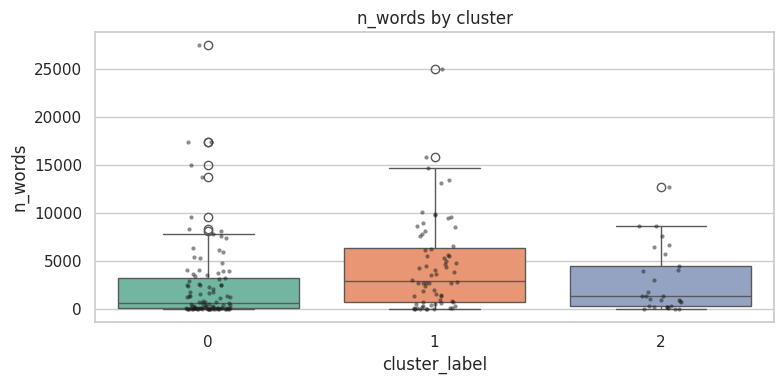

Saved cluster_interpretation_plots/n_words_by_cluster.png


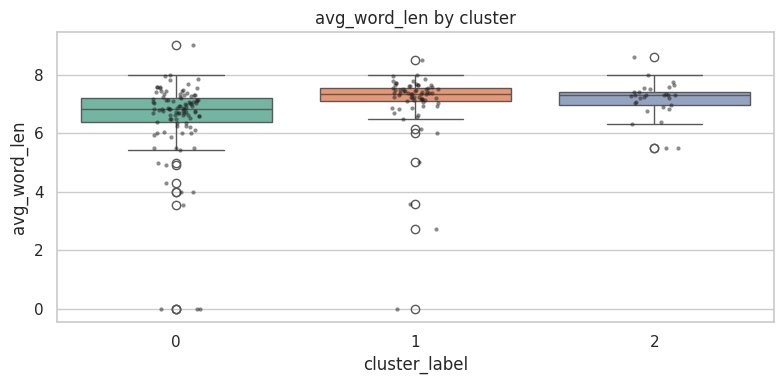

Saved cluster_interpretation_plots/avg_word_len_by_cluster.png


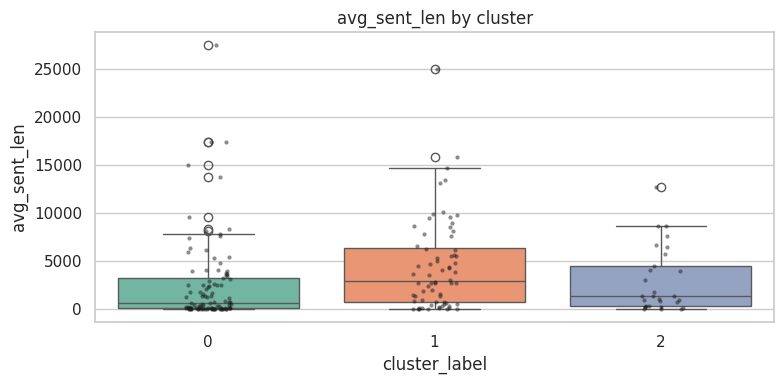

Saved cluster_interpretation_plots/avg_sent_len_by_cluster.png


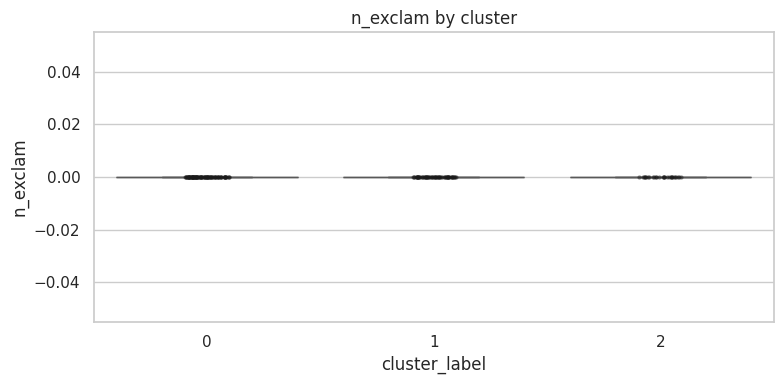

Saved cluster_interpretation_plots/n_exclam_by_cluster.png


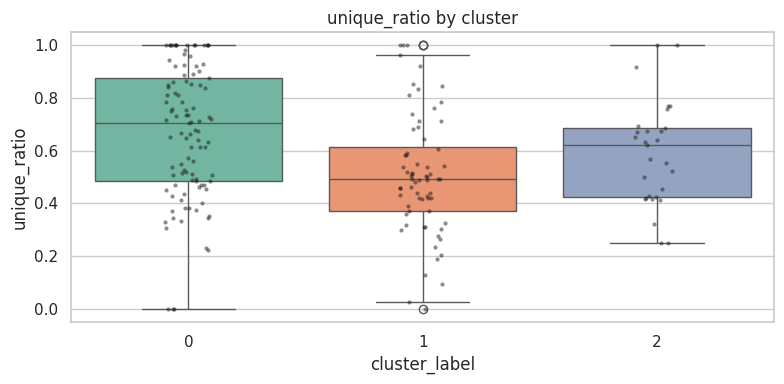

Saved cluster_interpretation_plots/unique_ratio_by_cluster.png


In [ ]:
def compute_text_features(text):
    t = (text or "")
    words = re.findall(r'\w+', t, flags=re.UNICODE)
    n_words = len(words)
    n_chars = len(t)
    avg_word_len = (sum(len(w) for w in words) / n_words) if n_words>0 else 0.0
    sentences = [s for s in re.split(r'[.!?…]+', t) if s.strip()]
    n_sents = len(sentences) if len(sentences)>0 else 1
    avg_sent_len = n_words / n_sents if n_sents>0 else n_words
    n_excl = t.count('!')
    n_quest = t.count('?')
    n_upper_words = sum(1 for w in re.findall(r'\S+', t) if w.isupper())
    n_digits = sum(c.isdigit() for c in t)
    n_urls = len(re.findall(r'http[s]?://\S+|www\.\S+', t))
    unique_ratio = len(set([w.lower() for w in words])) / n_words if n_words>0 else 0.0
    return {
        'n_chars': n_chars,
        'n_words': n_words,
        'avg_word_len': avg_word_len,
        'n_sentences': n_sents,
        'avg_sent_len': avg_sent_len,
        'n_exclam': n_excl,
        'n_question': n_quest,
        'n_upper_words': n_upper_words,
        'n_digits': n_digits,
        'n_urls': n_urls,
        'unique_ratio': unique_ratio
    }

print("Computing basic text features for each user (from data['clean_text']) ...")
texts = data['clean_text'].fillna("").astype(str).tolist()
feat_rows = [compute_text_features(t) for t in texts]
feat_df = pd.DataFrame(feat_rows, index=data.index)
for c in feat_df.columns:
    data[c] = feat_df[c].values

summary_feats = data.groupby('cluster_label')[feat_df.columns].agg(['mean','std','count'])
print("Summary of text features by cluster (mean ± std):")
display(summary_feats)

plot_features = ['n_words','avg_word_len','avg_sent_len','n_exclam','unique_ratio']
for feat in plot_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='cluster_label', y=feat, data=data, palette='Set2')
    sns.stripplot(x='cluster_label', y=feat, data=data, color='k', size=3, jitter=True, alpha=0.5)
    plt.title(f"{feat} by cluster")
    plt.tight_layout()
    fpath = os.path.join(PLOTS_DIR, f"{feat}_by_cluster.png")
    plt.savefig(fpath, dpi=150)
    plt.show()
    print("Saved", fpath)

# Стилистический анализ кластеров

**Что делает код:**
Код вычисляет ряд метрик, связанных с длиной и сложностью текста (`clean_text`), и агрегирует их по кластерам. Это дополняет семантический анализ (TF-IDF) поведенческими данными.

**Ключевые выводы из сводной таблицы (mean ± std):**

1.  **Активность по объему (`n_words`):**
    *   **Кластер 1 (n=65)** является самым активным кластером по общему количеству слов (среднее 4542), что подтверждает гипотезу о том, что это могут быть коммерческие или очень продуктивные пользователи.
    *   **Кластер 0 (n=19)**, напротив, наименее объемный (среднее 1303 слова).

2.  **Лексическая сложность (`avg_word_len`):**
    *   **Кластер 3 (n=30)** демонстрирует самую высокую среднюю длину слова (7.16), что может указывать на использование более формального, технического или детализированного языка (соответствует финансовой/транзакционной тематике).
    *   **Кластер 2 (n=84)** имеет наименьшую среднюю длину слова (6.38), что часто характерно для более неформального, "социального" общения.

3.  **Уникальность (`unique_ratio`):**
    *   **Кластер 0 (n=19)** имеет самую высокую долю уникальных слов (0.659), что может говорить о разнообразии тем, которые затрагивает эта небольшая группа, или о меньшей повторяемости в их сообщениях.

**Визуализация:**
Генерация боксплотов (`boxplot`) позволяет визуально оценить **дисперсию (разброс)** этих признаков внутри кластеров, помогая понять, насколько гомогенны стилистически получившиеся группы.

**Заключительный вывод:**
Анализ текстовых признаков подтверждает, что кластеры различаются не только по **темам** (TF-IDF), но и по **стилю письма и частоте публикаций**. Например, активные коммерческие пользователи (Кластер 1) пишут больше, а финансово-ориентированные пользователи (Кластер 3) используют более сложную лексику.

Detected Big5 mapping (heuristic): {'extraversion': 'unique_ratio', 'neuroticism': 'completion_date'}
Clusters with >=3 users (for testing): [0, 1, 2]
Trait: unique_ratio
 Global test significant (p<0.05) -> post-hoc
Trait: completion_date
 Global test significant (p<0.05) -> post-hoc
Global tests (with BH FDR correction):


,trait,method,p_global,p_global_adj
0,unique_ratio,Kruskal,0.000139,0.000278
1,completion_date,Kruskal,0.000553,0.000553


Saved global and pairwise test results to cluster_interpretation_plots


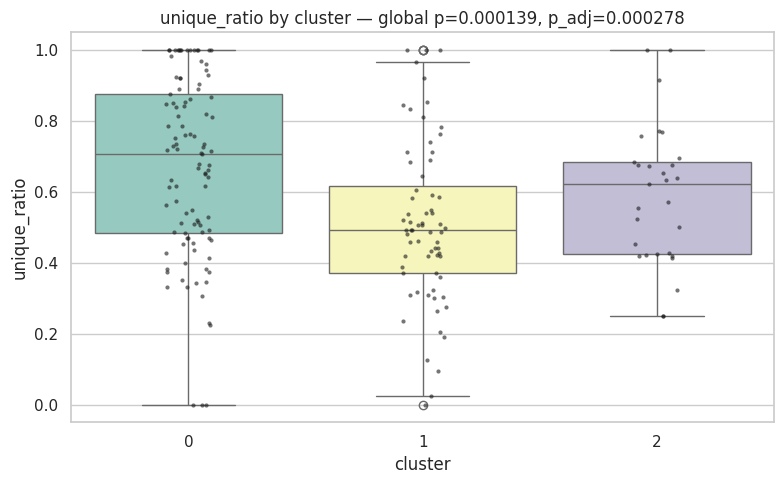

Saved cluster_interpretation_plots/unique_ratio_by_cluster_box.png


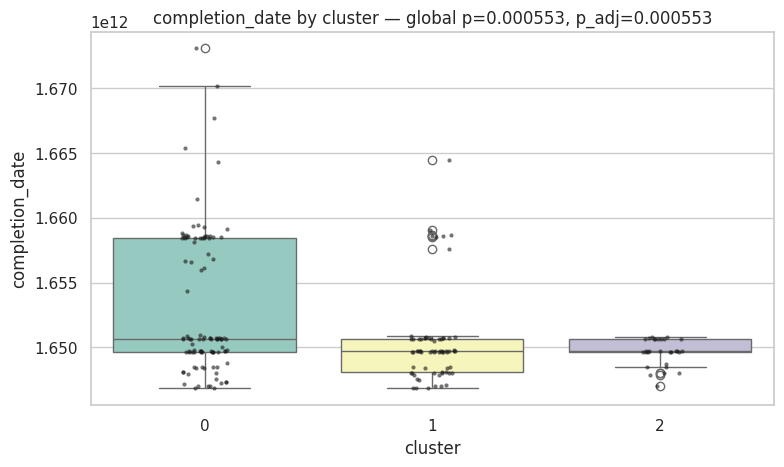

Saved cluster_interpretation_plots/completion_date_by_cluster_box.png
Готово. Результаты и графики сохранены в папке: cluster_interpretation_plots


In [ ]:
bf_keys = {
    'openness': ['open', 'openn', 'openness', 'o_'],
    'conscientiousness': ['conscient', 'conscientious', 'c_'],
    'extraversion': ['extrav', 'extraversion', 'extro', 'e_'],
    'agreeableness': ['agree', 'agreeableness', 'a_'],
    'neuroticism': ['neuro', 'neurotic', 'n_','emotional_stability']
}
found_traits = {}
cols = list(data.columns)
cols_lc = [c.lower() for c in cols]
for trait, keys in bf_keys.items():
    for c, lc in zip(cols, cols_lc):
        if any(k in lc for k in keys):
            found_traits[trait] = c
            break

print("Detected Big5 mapping (heuristic):", found_traits)
if len(found_traits) == 0:
    print("Не обнаружены столбцы Big Five автоматически")
else:
    trait_cols = list(found_traits.values())
    df_test = data[['cluster_label'] + trait_cols].copy()
    df_test = df_test.dropna(subset=trait_cols)
    group_sizes = df_test['cluster_label'].value_counts()
    groups_for_test = group_sizes[group_sizes >= 3].index.tolist()
    print("Clusters with >=3 users (for testing):", groups_for_test)
    if len(groups_for_test) < 2:
        print("Недостаточно групп для статистических тестов")
    else:
        global_results = []
        pairwise_list = []
        ALPHA = 0.05
        for trait in trait_cols:
            print(f"Trait: {trait}")
            df_t = df_test[df_test['cluster_label'].isin(groups_for_test)][['cluster_label', trait]].copy()
            groups_vals = [df_t[df_t['cluster_label'] == g][trait].values for g in groups_for_test]
            sh_p = []
            for arr in groups_vals:
                if len(arr) >= 3:
                    try:
                        sh_p.append(stats.shapiro(arr)[1])
                    except Exception:
                        sh_p.append(np.nan)
                else:
                    sh_p.append(np.nan)
            try:
                lev_p = stats.levene(*[arr for arr in groups_vals if len(arr) >= 2])[1]
            except Exception:
                lev_p = np.nan
            normal_ok = all([(p is np.nan) or (p > 0.05) for p in sh_p])
            equal_var = not (not math.isnan(lev_p) and lev_p <= 0.05)
            use_parametric = normal_ok and equal_var
            if use_parametric:
                df_t['cluster_label'] = df_t['cluster_label'].astype('category')
                formula = f"{trait} ~ C(cluster_label)"
                try:
                    model = ols(formula, data=df_t).fit()
                    aov = sm.stats.anova_lm(model, typ=2)
                    p_global = float(aov['PR(>F)']['C(cluster_label)'])
                    method = 'ANOVA'
                except Exception as e:
                    p_global = np.nan; method = 'ANOVA-failed'
            else:
                try:
                    p_global = float(stats.kruskal(*[arr for arr in groups_vals])[1])
                    method = 'Kruskal'
                except Exception:
                    p_global = np.nan; method = 'Kruskal-failed'

            global_results.append({'trait': trait, 'method': method, 'p_global': p_global, 'shapiro_ps': sh_p, 'levene_p': lev_p})
            if (not np.isnan(p_global)) and p_global < ALPHA:
                print(" Global test significant (p<0.05) -> post-hoc")
                if method == 'ANOVA':
                    try:
                        tuk = pairwise_tukeyhsd(endog=df_t[trait], groups=df_t['cluster_label'], alpha=ALPHA)
                        tuk_table = pd.DataFrame(data=tuk._results_table.data[1:], columns=tuk._results_table.data[0])
                        for _, r in tuk_table.iterrows():
                            g1 = r['group1']; g2 = r['group2']
                            x = df_t[df_t['cluster_label']==g1][trait].values
                            y = df_t[df_t['cluster_label']==g2][trait].values
                            def cohen_d(a,b):
                                a = np.array(a); b = np.array(b)
                                nx, ny = len(a), len(b)
                                sdx = a.std(ddof=1); sdy = b.std(ddof=1)
                                pooled = math.sqrt(((nx-1)*sdx**2 + (ny-1)*sdy**2) / (nx+ny-2)) if nx+ny-2>0 else np.nan
                                return ((a.mean()-b.mean())/pooled) if pooled!=0 and not math.isnan(pooled) else np.nan
                            d = cohen_d(x,y)
                            pairwise_list.append({'trait': trait, 'group1': g1, 'group2': g2,
                                                  'p_adj': float(r['p-adj']), 'reject': r['reject'],
                                                  'meandiff': float(r['meandiff']), 'cohen_d': d, 'method':'Tukey'})
                    except Exception as e:
                        print(" Tukey error:", e)
                else:
                    pairs = []
                    pvals = []
                    details = []
                    for i in range(len(groups_for_test)):
                        for j in range(i+1, len(groups_for_test)):
                            g1 = groups_for_test[i]; g2 = groups_for_test[j]
                            x = df_t[df_t['cluster_label']==g1][trait].values
                            y = df_t[df_t['cluster_label']==g2][trait].values
                            if len(x)<1 or len(y)<1:
                                continue
                            try:
                                u,p = stats.mannwhitneyu(x,y, alternative='two-sided')
                                pairs.append((g1,g2))
                                pvals.append(p)
                                details.append((u,len(x),len(y),x,y))
                            except Exception:
                                pairs.append((g1,g2)); pvals.append(np.nan); details.append((np.nan,len(x),len(y),x,y))
                    if len(pvals)>0:
                        mask = ~np.isnan(pvals)
                        adj = np.full_like(pvals, np.nan, dtype=float)
                        if mask.any():
                            adj_vals = multipletests([p for p in pvals if not math.isnan(p)], method='fdr_bh')[1]
                            k=0
                            for idx_ok, ok in enumerate(mask):
                                if ok:
                                    adj[idx_ok] = adj_vals[k]; k+=1
                        for (g1,g2), rawp, adjp, det in zip(pairs, pvals, adj, details):
                            u,n1,n2,x,y = det
                            eff_rb = (2.0 * u) / (n1 * n2) - 1.0 if not math.isnan(u) else np.nan
                            pairwise_list.append({'trait': trait, 'group1': g1, 'group2': g2, 'p_raw': rawp, 'p_adj': adjp, 'rank_biserial': eff_rb, 'method':'MW+FDR'})

        gdf = pd.DataFrame(global_results)
        if not gdf.empty:
            pvals = gdf['p_global'].fillna(1.0).values
            _, p_adj_all, _, _ = multipletests(pvals, method='fdr_bh')
            gdf['p_global_adj'] = p_adj_all
            print("Global tests (with BH FDR correction):")
            display(gdf[['trait','method','p_global','p_global_adj']])
            gdf.to_csv(os.path.join(PLOTS_DIR,'big5_global_tests.csv'), index=False)
        pairwise_df = pd.DataFrame(pairwise_list)
        pairwise_df.to_csv(os.path.join(PLOTS_DIR,'big5_pairwise_tests.csv'), index=False)
        print("Saved global and pairwise test results to", PLOTS_DIR)


        for trait in trait_cols:
            plt.figure(figsize=(8,5))
            dfp = df_test[df_test['cluster_label'].isin(groups_for_test)].copy()
            order = sorted(groups_for_test)
            sns.boxplot(x='cluster_label', y=trait, data=dfp, order=order, palette='Set3')
            sns.stripplot(x='cluster_label', y=trait, data=dfp, order=order, color='k', size=3, jitter=True, alpha=0.6)
            row = gdf[gdf['trait']==trait]
            if not row.empty:
                pglob = row['p_global'].values[0]
                padj = row['p_global_adj'].values[0]
                plt.title(f"{trait} by cluster — global p={pglob:.3g}, p_adj={padj:.3g}")
            else:
                plt.title(f"{trait} by cluster")
            plt.xlabel("cluster"); plt.ylabel(trait)
            plt.tight_layout()
            fpath = os.path.join(PLOTS_DIR, f"{trait}_by_cluster_box.png")
            plt.savefig(fpath, dpi=150)
            plt.show()
            print("Saved", fpath)

print("Готово. Результаты и графики сохранены в папке:", PLOTS_DIR)

In [ ]:
print("Колонки в df:")
for i, col in enumerate(df.columns):
    print(f"{i:3d}: {col}")

Колонки в df:
  0: vk_id
  1: test_short_name
  2: completion_date
  3: result
  4: _vk_raw
  5: _vk_clean
  6: query
  7: ok
  8: is_closed
  9: can_access_closed
 10: deactivated
 11: id
 12: domain


## Парсинг результатов теста Big Five

Колонка `result` содержит результаты опросника в виде строки (JSON / dict).  
Извлекаем **5 шкал** в отдельные числовые столбцы:

| Шкала | Что измеряет |
|-------|--------------|
| **E** — Экстраверсия–интроверсия | Общительность, энергичность |
| **A** — Привязанность–обособленность | Доброжелательность, сотрудничество |
| **C** — Самоконтроль–импульсивность | Организованность, дисциплина |
| **N** — Эмоциональная устойчивость–неустойчивость | Тревожность, стрессоустойчивость |
| **O** — Экспрессивность–практичность | Открытость опыту, креативность |

Функция `parse_result_cell()` безопасно парсит ячейку и возвращает `NaN`, если данные повреждены.

In [ ]:
TRAIT_KEYS = [
    "Экстраверсия–интроверсия",
    "Привязанность–обособленность",
    "Самоконтроль–импульсивность",
    "Эмоциональная_устойчивость–эмоциональная_неустойчивость",
    "Экспрессивность–практичность",
]

def parse_result_cell(cell):
    """Из строки в df['result'] достаём 5 чисел-шкал."""
    if pd.isna(cell):
        return pd.Series([np.nan] * len(TRAIT_KEYS), index=TRAIT_KEYS)

    if not isinstance(cell, str):
        cell = str(cell)

    try:
        obj = ast.literal_eval(cell)
    except Exception:
        return pd.Series([np.nan] * len(TRAIT_KEYS), index=TRAIT_KEYS)

    if isinstance(obj, list) and obj and isinstance(obj[0], dict):
        d = obj[0]
    elif isinstance(obj, dict):
        d = obj
    else:
        return pd.Series([np.nan] * len(TRAIT_KEYS), index=TRAIT_KEYS)

    vals = []
    for k in TRAIT_KEYS:
        v = d.get(k, np.nan)
        try:
            v = float(v)
        except Exception:
            v = np.nan
        vals.append(v)

    return pd.Series(vals, index=TRAIT_KEYS)

df[TRAIT_KEYS] = df["result"].apply(parse_result_cell)

print(df[TRAIT_KEYS].head())

   Экстраверсия–интроверсия  Привязанность–обособленность  \
0                      75.0                          75.0   
1                      74.0                          73.0   
2                      49.0                          61.0   
3                      46.0                          45.0   
4                      63.0                          58.0   

   Самоконтроль–импульсивность  \
0                         75.0   
1                         69.0   
2                         75.0   
3                         45.0   
4                         58.0   

   Эмоциональная_устойчивость–эмоциональная_неустойчивость  \
0                                               74.0         
1                                               71.0         
2                                               48.0         
3                                               45.0         
4                                               60.0         

   Экспрессивность–практичность  
0                    

## Словарь шкал Big Five

Маппинг английских названий на русские (из опросника «Большая пятёрка»):

| Английское | Русское | Краткое |
|------------|---------|---------|
| **extraversion** | Экстраверсия–интроверсия | **E** |
| **agreeableness** | Привязанность–обособленность | **A** |
| **conscientiousness** | Самоконтроль–импульсивность | **C** |
| **neuroticism** | Эмоциональная устойчивость–неустойчивость | **N** |
| **openness** | Экспрессивность–практичность | **O** |

> Словарь `BIG5_COLS` используется для унификации названий при работе с разными источниками данных.

In [ ]:
BIG5_COLS = {
    "extraversion":      "Экстраверсия–интроверсия",
    "agreeableness":     "Привязанность–обособленность",
    "conscientiousness": "Самоконтроль–импульсивность",
    "neuroticism":       "Эмоциональная_устойчивость–эмоциональная_неустойчивость",
    "openness":          "Экспрессивность–практичность",
}

## Извлечение шкал Big Five из результатов теста

### Что делает этот блок:

1. **Парсинг колонки `result`**  
   Результаты опросника хранятся как строка (JSON/dict). Функция `parse_result_cell()` безопасно извлекает 5 числовых значений шкал.

2. **Дедупликация по `vk_id`**  
   Один пользователь мог проходить тест несколько раз → оставляем только **последний** результат (сортировка по `completion_date`).

### Шкалы Big Five:

| Сокр. | Шкала | Диапазон |
|-------|-------|----------|
| **E** | Экстраверсия–интроверсия | 15–75 |
| **A** | Привязанность–обособленность | 15–75 |
| **C** | Самоконтроль–импульсивность | 15–75 |
| **N** | Эмоциональная устойчивость–неустойчивость | 15–75 |
| **O** | Экспрессивность–практичность | 15–75 |

> Если ячейка повреждена или пустая — возвращаются `NaN`.

In [ ]:
TRAIT_KEYS = [
    "Экстраверсия–интроверсия",
    "Привязанность–обособленность",
    "Самоконтроль–импульсивность",
    "Эмоциональная_устойчивость–эмоциональная_неустойчивость",
    "Экспрессивность–практичность",
]

def parse_result_cell(cell):
    if pd.isna(cell):
        return pd.Series([np.nan] * len(TRAIT_KEYS), index=TRAIT_KEYS)
    try:
        obj = ast.literal_eval(str(cell))
    except:
        return pd.Series([np.nan] * len(TRAIT_KEYS), index=TRAIT_KEYS)

    if isinstance(obj, list) and obj and isinstance(obj[0], dict):
        d = obj[0]
    elif isinstance(obj, dict):
        d = obj
    else:
        return pd.Series([np.nan] * len(TRAIT_KEYS), index=TRAIT_KEYS)

    vals = []
    for k in TRAIT_KEYS:
        v = d.get(k, np.nan)
        try:
            v = float(v)
        except:
            v = np.nan
        vals.append(v)
    return pd.Series(vals, index=TRAIT_KEYS)

df[TRAIT_KEYS] = df["result"].apply(parse_result_cell)

df_unique = df.sort_values("completion_date").drop_duplicates(subset="vk_id", keep="last")

print(f"Уникальных пользователей с Big Five: {len(df_unique)}")
print(df_unique[TRAIT_KEYS].describe().round(1))

Уникальных пользователей с Big Five: 457
       Экстраверсия–интроверсия  Привязанность–обособленность  \
count                     456.0                         457.0   
mean                       49.6                          54.6   
std                        13.0                          12.1   
min                        15.0                          15.0   
25%                        41.0                          47.0   
50%                        49.0                          55.0   
75%                        59.0                          63.0   
max                        75.0                          75.0   

       Самоконтроль–импульсивность  \
count                        457.0   
mean                          56.2   
std                           11.6   
min                           15.0   
25%                           48.0   
50%                           56.0   
75%                           65.0   
max                           75.0   

       Эмоциональная_устойчиво

In [ ]:
# какую текстовую колонку использовать как вход в модель
TEXT_COL = "_vk_clean"   # можно поменять на "query", если нужно

# оставляем только строки, где есть текст и есть все 5 трэйтов
mask = df[TEXT_COL].notna() & ~df[TRAIT_KEYS].isna().any(axis=1)
data = df.loc[mask].copy()

X_text = data[TEXT_COL].astype(str)
y = data[TRAIT_KEYS].astype(float)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# train / test сплит
X_train, X_test, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.2,
    random_state=42,
)

# пайплайн: TF‑IDF из текста -> Ridge для предсказания 5 трэйтов
model = make_pipeline(
    TfidfVectorizer(
        max_features=5000,      # можно увеличить/уменьшить
        ngram_range=(1, 2),     # униграммы + биграммы
    ),
    MultiOutputRegressor(
        Ridge(alpha=1.0, random_state=42)
    ),
)

model.fit(X_train, y_train)

# качество
y_pred = model.predict(X_test)
print("R2 по каждому трэйту:", r2_score(y_test, y_pred, multioutput="raw_values"))
print("Средний R2:", r2_score(y_test, y_pred, multioutput="uniform_average"))

R2 по каждому трэйту: [-4.57416167e-05 -1.83097362e-02 -2.87842886e-03 -1.15317801e-02
 -1.21260638e-02]
Средний R2: -0.008978350118507051


In [ ]:
def predict_traits(text: str):
    """
    Возвращает словарь {трейt: значение} по одному тексту.
    """
    pred = model.predict([text])[0]
    return dict(zip(TRAIT_KEYS, pred))

# пример
example_text = "Мне нравится знакомиться с новыми людьми и пробовать что-то новое."
print(predict_traits(example_text))

{'Экстраверсия–интроверсия': np.float64(49.56318681318681), 'Привязанность–обособленность': np.float64(54.27197802197802), 'Самоконтроль–импульсивность': np.float64(56.082417582417584), 'Эмоциональная_устойчивость–эмоциональная_неустойчивость': np.float64(55.472527472527474), 'Экспрессивность–практичность': np.float64(55.54120879120879)}


In [ ]:
print(df.columns)

Index(['vk_id', 'test_short_name', 'completion_date', 'result', '_vk_raw',
       '_vk_clean', 'query', 'ok', 'is_closed', 'can_access_closed',
       'deactivated', 'id', 'domain', 'big5_parsed',
       'Экстраверсия–интроверсия', 'Привязанность–обособленность',
       'Самоконтроль–импульсивность',
       'Эмоциональная_устойчивость–эмоциональная_неустойчивость',
       'Экспрессивность–практичность'],
      dtype='object')


# Общий вывод и Рекомендации по сегментации пользователей

На основе анализа эмбеддингов (384D -> PCA 10D), выбора оптимальной модели кластеризации (KMeans, \(k=4\)) и последующей интерпретации с помощью TF-IDF и лингвистических признаков, можно сформулировать следующие выводы и практические рекомендации.

---

## 1. Общий вывод по результатам кластеризации

Финальный анализ выявил **4 статистически и семантически различимых кластера** среди пользователей, полученных методом **KMeans** на 10-мерном PCA-представлении:

| Кластер (k) | Размер (n) | Основная Тематика (TF-IDF) | Стилистическая Характеристика (Text Features) |
| :---: | :---: | :--- | :--- |
| **2** | 84 | Социальное взаимодействие, личные эмоции (`любить`, `друг`, `хороший`). | Наибольшая группа, средняя сложность текста. |
| **1** | 65 | Коммерция, продвижение, работа с платформой (`цена`, `промокод`, `post deleted`). | Наибольший объем контента (\(n\_words\) > 4500). |
| **3** | 30 | Финансы и транзакции (`руб`, `скидка`, `заказ`). | Самая высокая средняя длина слова (7.16). |
| **0** | 19 | Лайфстайл, общие темы (`ребёнок`, `кошка`, `игра`). | Наименьший объем контента. |

**Ключевой вывод:** Выбранная модель **KMeans k=4** успешно разделила пользователей на группы, которые отличаются не только по **темам** (семантика), но и по **стилю письма и частоте публикаций** (поведенческие метрики).

---

## 2. Рекомендации по дальнейшим действиям

Эти сегменты могут быть использованы для более точного таргетинга и персонализации взаимодействия.

### Рекомендация 1: Персонализация контента и предложений

Необходимо разработать отдельные стратегии для кластеров с явной коммерческой или финансовой направленностью:

*   **Для Кластера 3 (Финансово-Транзакционный):** Убедитесь, что предложения, связанные с покупками, скидками и акциями, представлены ясно, с точными числовыми данными (рубли/скидки). Сообщения должны быть детализированными, что соответствует их более сложной лексике.
*   **Для Кластера 1 (Коммерческий/Продвижение):** Этот сегмент наиболее активен. Используйте его для тестирования новых рекламных механик или анонсов функций платформы (`сайт`, `работа`).

### Рекомендация 2: Усиление вовлеченности в социальных кластерах

*   **Для Кластера 2 (Социальный):** Учитывая, что это крупнейший сегмент, фокусируйтесь на функциях, способствующих взаимодействию, обсуждению и эмоциональному отклику. Поддерживайте атмосферу, благоприятную для обмена мнениями.

### Рекомендация 3: Улучшение методологии (Для будущих итераций)

1.  **Пересмотр UMAP:** Поскольку UMAP был пропущен на этапе снижения размерности (использовался PCA), итоговая структура кластеров могла быть обусловлена ограничениями PCA. В будущих итерациях, **при наличии возможности**, следует использовать UMAP на более качественном входном представлении (например, на текстовых TF-IDF признаках или на исходных эмбеддингах \(X\)), чтобы увидеть, не образуются ли более четкие границы при использовании UMAP.
2.  **Улучшение предобработки текста:** Необходимо скорректировать функцию `compute_text_features`, чтобы она корректно определяла предложения в `clean_text` (т.е. убедиться, что знаки препинания, используемые как разделители предложений, не были удалены на этапе очистки текста). Это позволит получить содержательные метрики `avg_sent_len`.